In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Data_v2
import Data_analysis_func
import Model_checks
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression
import Outlier_detection_v2
import Genes_self_similarity_v2
from matplotlib_venn import venn2, venn2_circles
import Feature_engineering
import Clusters

In [23]:
data = Data_v2.get_format_data_without_na()

In [24]:
data_WT = data[data['mutant_ID'] == 'WT']

In [25]:
mean_intra_distance_for_WT = Genes_self_similarity_v2.get_mean_intra_distance_for_WT(data_WT)

In [26]:
weighted_avg_y2 = (mean_intra_distance_for_WT['mean_intra_gene_distance_y2'] * mean_intra_distance_for_WT['sample_count']).sum() / mean_intra_distance_for_WT['sample_count'].sum()
weighted_avg_ynpq = (mean_intra_distance_for_WT['mean_intra_gene_distance_ynpq'] * mean_intra_distance_for_WT['sample_count']).sum() / mean_intra_distance_for_WT['sample_count'].sum()

print("Weighted Average of mean_intra_gene_distance_y2:", weighted_avg_y2)
print("Weighted Average of mean_intra_gene_distance_ynpq:", weighted_avg_ynpq)

Weighted Average of mean_intra_gene_distance_y2: 0.06337416600333277
Weighted Average of mean_intra_gene_distance_ynpq: 0.06106741257156122


In [27]:
data_flagged = Genes_self_similarity_v2.apply_flagging_WT(data, threshold_distance_y2=2*weighted_avg_y2, threshold_distance_ynpq=2*weighted_avg_ynpq, p=(2/3), threshold_variance = 1)

In [28]:
data_norm = Data_v2.normalize_data_additive(data_flagged)

/Users/samsongourevitch/Documents/Chlamy_Project_Github/Chlamy_project/Data_v2.py:185: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_copy.at[index, column_name] -= wt_mean_y2[i - 1]
/Users/samsongourevitch/Documents/Chlamy_Project_Github/Chlamy_project/Data_v2.py:193: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_copy.at[index, column_name] -= wt_mean_ynpq[i - 1]


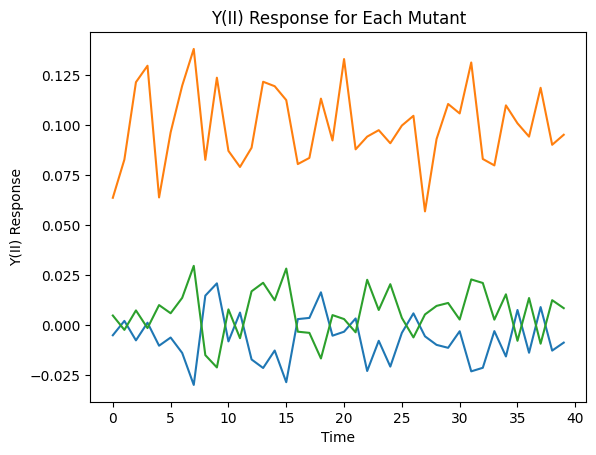

In [29]:
Data_analysis_func.plot_y2(data_norm[(data_norm['plate'] == 4) & (data_norm['mutant_ID'] == 'WT') & (data_norm['light_regime'] == '20h_HL')].iloc[:20])

In [32]:
data_norm_flagged = Genes_self_similarity_v2.apply_flagging_mutants(data_norm, threshold_distance_y2=2*weighted_avg_y2, threshold_distance_ynpq=2*weighted_avg_ynpq, p=(2/3), threshold_variance = 1)

In [33]:
data_norm_flagged

plate measurement start_date light_regime  dark_threshold  \
0         99          M1 2023-10-12    1min-1min       16.903264   
1         99          M1 2023-10-12    1min-1min       16.903264   
2         99          M1 2023-10-12    1min-1min       16.903264   
3         99          M1 2023-10-12    1min-1min       16.903264   
4         99          M1 2023-10-12    1min-1min       16.903264   
...      ...         ...        ...          ...             ...   
53518      6          M6 2024-04-22      30s-30s       15.294150   
53519      6          M6 2024-04-22      30s-30s       15.294150   
53520      6          M6 2024-04-22      30s-30s       15.294150   
53521      6          M6 2024-04-22      30s-30s       15.294150   
53522      6          M6 2024-04-22      30s-30s       15.294150   

       light_threshold  num_frames   i   j     fv_fm  ...  median  \
0            24.476540         164   0   1 -0.006258  ...    None   
1            24.476540         164   0   2 -0.016211  ...    None   
2            24.476540         164   0   3 -0.005031  ...    None   
3            24.476540         164   0   4 -0.024731  ...    None   
4            24.476540         164   0   5 -0.003857  ...    None   
...                ...         ...  ..  ..       ...  ...     ...   
53518        28.350881         164  15  19 -0.078833  ...    None   
53519        28.350881         164  15  20 -0.022608  ...    None   
53520        28.350881         164  15  21 -0.061109  ...    None   
53521        28.350881         164  15  22 -0.111192  ...    None   
53522        28.350881         164  15  23 -0.025609  ...    None   

       log_likelihood_null  mutated_genes_light_regime_count  flag_y2_x  \
0                     None                               831         ok   
1                     None                               831         ok   
2                     None                               831         ok   
3                     None                               831         ok   
4                     None                               831         ok   
...                    ...                               ...        ...   
53518                 None                                 3        NaN   
53519                 None                                 2        NaN   
53520                 None                                 2        NaN   
53521                 None                                 4        NaN   
53522                 None                                 2        NaN   

       flag_ynpq_x  fv_fm_WT  fv_fm_end_WT  ynpqend_WT  flag_y2_y  flag_ynpq_y  
0               ok  0.622337      0.591999    0.011219         ok           ok  
1               ok  0.622337      0.591999    0.011219         ok           ok  
2               ok  0.622337      0.591999    0.011219         ok           ok  
3               ok  0.622337      0.591999    0.011219         ok           ok  
4               ok  0.622337      0.591999    0.011219         ok           ok  
...            ...       ...           ...         ...        ...          ...  
53518          NaN  0.638787      0.605804    0.002948      weird        weird  
53519          NaN  0.638787      0.605804    0.002948         ok        weird  
53520          NaN  0.638787      0.605804    0.002948         ok           ok  
53521          NaN  0.638787      0.605804    0.002948      weird           ok  
53522          NaN  0.638787      0.605804    0.002948      weird        weird  

[53523 rows x 437 columns]

In [34]:
# rename flag_y2_y into flag_y2 and drop flag_y2_x
data_norm_flagged.rename(columns={'flag_y2_y': 'flag_y2'}, inplace=True)
data_norm_flagged.rename(columns={'flag_ynpq_y': 'flag_ynpq'}, inplace=True)
data_norm_flagged.drop(columns='flag_y2_x', inplace=True)
data_norm_flagged.drop(columns='flag_ynpq_x', inplace=True)

In [35]:
data_norm_flagged['flag_y2'].value_counts()

flag_y2
ok       32179
weird    21344
Name: count, dtype: int64

In [36]:
data_norm_flagged['flag_ynpq'].value_counts()

flag_ynpq
ok       32613
weird    20910
Name: count, dtype: int64

In [282]:
data = Data_v2.get_format_data()

In [37]:
data_norm_flagged[(data_norm_flagged['mutated_genes'] == data_norm_flagged['mutated_genes'].unique()[9])]

plate measurement start_date light_regime  dark_threshold  \
774        2          M1 2023-10-18    1min-1min       17.221402   
1178       2          M3 2023-10-20       20h_HL       19.047878   
1583       2          M4 2023-10-21       20h_ML       17.751546   
1988       2          M6 2023-10-23        2h-2h       18.438627   
33734     18          M1 2024-03-01    1min-1min       18.655415   
34144     18          M2 2024-03-02       20h_HL       20.018520   
34554     18          M3 2024-03-03       20h_ML       19.418010   
34964     18          M4 2024-03-04        2h-2h       18.365585   
35374     18          M5 2024-03-05  10min-10min       20.521538   
35784     18          M6 2024-03-06      30s-30s       18.095236   
49097      2          M5 2024-04-12  10min-10min       14.969336   
49504      2          M6 2024-04-13      30s-30s       14.060347   

       light_threshold  num_frames  i   j     fv_fm  ...   mean_y2  mean_ynpq  \
774          25.338585         164  0   7 -0.018804  ... -0.010124  -0.005652   
1178         24.634703          84  0   7 -0.019086  ... -0.034146   0.027987   
1583         24.354278          84  0   7 -0.020260  ... -0.007519   0.027644   
1988         27.503764          84  0   7 -0.008176  ... -0.000236   0.050256   
33734        26.858334         164  6  15 -0.026453  ...  0.001517   0.022051   
34144        26.022455          84  6  15 -0.020810  ... -0.021696   0.083858   
34554        26.807572          84  6  15 -0.039652  ... -0.048820   0.044126   
34964        26.798784          84  6  15 -0.025238  ... -0.010951   0.013895   
35374        29.517519         164  6  15 -0.032203  ... -0.003032   0.018950   
35784        26.128745         164  6  15 -0.035531  ... -0.051902   0.017810   
49097        27.895836         164  0   7 -0.000037  ... -0.012998  -0.023716   
49504        25.758185         164  0   7 -0.037782  ... -0.024430  -0.039785   

       median  log_likelihood_null  mutated_genes_light_regime_count  \
774      None                 None                                 2   
1178     None                 None                                 2   
1583     None                 None                                 2   
1988     None                 None                                 2   
33734    None                 None                                 2   
34144    None                 None                                 2   
34554    None                 None                                 2   
34964    None                 None                                 2   
35374    None                 None                                 2   
35784    None                 None                                 2   
49097    None                 None                                 2   
49504    None                 None                                 2   

       fv_fm_WT  fv_fm_end_WT  ynpqend_WT  flag_y2  flag_ynpq  
774    0.609441      0.589635   -0.025696       ok         ok  
1178   0.614899      0.503979    0.050617       ok      weird  
1583   0.606694      0.581920   -0.134710       ok         ok  
1988   0.623532      0.606207   -0.220355       ok      weird  
33734  0.628580      0.598444   -0.053836       ok         ok  
34144  0.639141      0.543207   -0.022106       ok      weird  
34554  0.632641      0.604828   -0.086521       ok         ok  
34964  0.643243      0.624967   -0.091290       ok      weird  
35374  0.629813      0.588002   -0.034793       ok      weird  
35784  0.641175      0.631580   -0.030418    weird      weird  
49097  0.626559      0.587768   -0.026865       ok      weird  
49504  0.618320      0.588715   -0.014507    weird      weird  

[12 rows x 435 columns]

In [61]:
data_norm_flagged[(data_norm_flagged['mutated_genes'] == data_norm_flagged['mutated_genes'].unique()[17]) & (data_norm_flagged['light_regime'] == '20h_HL')]

plate measurement start_date light_regime  dark_threshold  \
1186       2          M3 2023-10-20       20h_HL       19.047878   
24524     14          M2 2024-02-07       20h_HL       20.659796   

       light_threshold  num_frames  i   j     fv_fm  ...   mean_y2  mean_ynpq  \
1186         24.634703          84  0  14 -0.071715  ... -0.071085  -0.031484   
24524        26.569090          84  4  10 -0.019488  ... -0.037759   0.109433   

       median  log_likelihood_null  mutated_genes_light_regime_count  \
1186     None                 None                                 2   
24524    None                 None                                 2   

       fv_fm_WT  fv_fm_end_WT  ynpqend_WT  flag_y2  flag_ynpq  
1186   0.614899      0.503979    0.050617       ok      weird  
24524  0.618345      0.539614   -0.185311       ok      weird  

[2 rows x 435 columns]

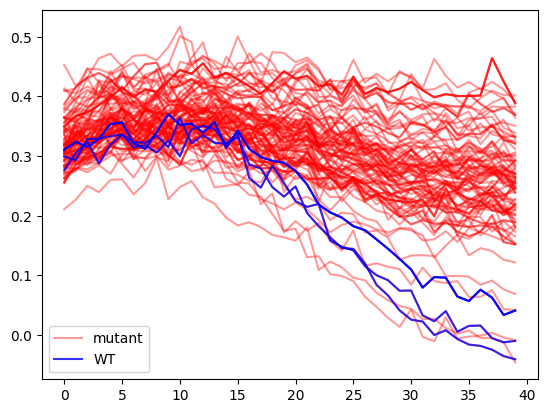

In [77]:
data_ynpq = data[(data['light_regime'] == '20h_HL') & (data['plate'] == 14)].iloc[:100].filter(like='ynpq_').dropna(axis=1).values

for i in range(data_ynpq.shape[0]):
    if i == data_ynpq.shape[0] - 1:
        plt.plot(data_ynpq[i], c='r', alpha=0.4, label='mutant')
    plt.plot(data_ynpq[i], c='r', alpha=0.4)

data_ynpq_WT = data[(data['mutant_ID'] == 'WT') & (data['light_regime'] == '20h_HL') & (data['plate'] == 14)].filter(like='ynpq_').dropna(axis=1).values

for i in range(data_ynpq_WT.shape[0]):
    if i == data_ynpq_WT.shape[0] - 1:
        plt.plot(data_ynpq_WT[i], c='b', alpha=0.8, label='WT')
    plt.plot(data_ynpq_WT[i], c='b', alpha=0.8)

plt.legend()
plt.show()

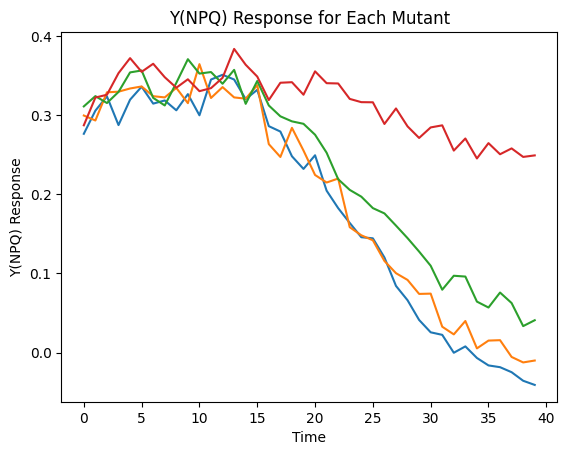

In [66]:
Data_analysis_func.plot_ynpq(data[((data['mutated_genes'] == data['mutated_genes'].unique()[17]) | (data['mutated_genes'] == '')) & (data['light_regime'] == '20h_HL') & (data['plate'] == 14)])

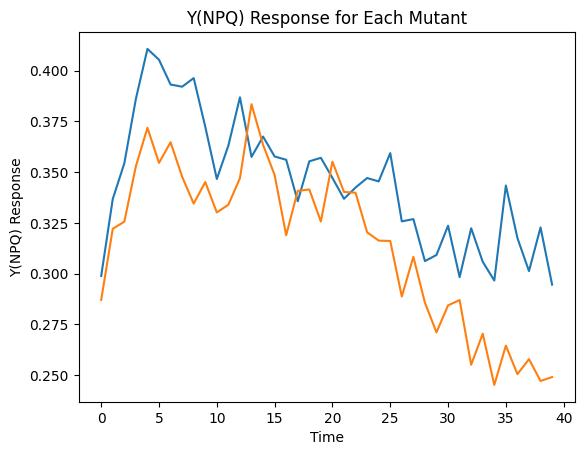

In [59]:
Data_analysis_func.plot_ynpq(data[(data['mutated_genes'] == data['mutated_genes'].unique()[17]) & (data['light_regime'] == '20h_HL')])

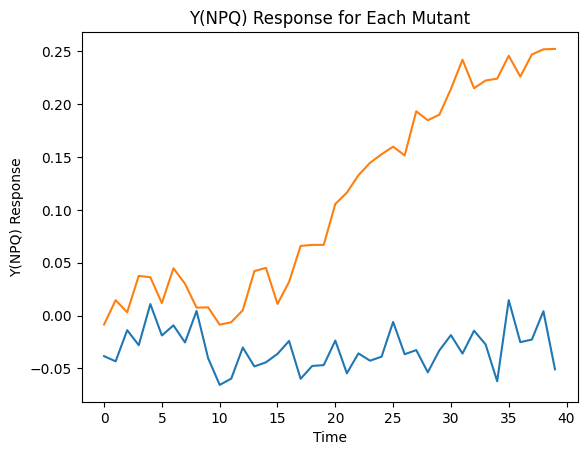

In [60]:
Data_analysis_func.plot_ynpq(data_norm_flagged[(data_norm_flagged['mutated_genes'] == data_norm_flagged['mutated_genes'].unique()[17]) & (data_norm_flagged['light_regime'] == '20h_HL')])

In [19]:
data_norm_flagged[(data_norm_flagged['mutated_genes'] == data_norm_flagged['mutated_genes'].unique()[30]) & (data_norm_flagged['light_regime'] == '20h_HL')]

plate measurement start_date light_regime  dark_threshold  \
1926       2          M3 2023-10-20       20h_HL       19.047878   
3506       3          M2 2023-10-25       20h_HL       22.022222   
18681     12          M2 2024-01-26       20h_HL       18.778625   
26245     16          M2 2024-02-19       20h_HL       19.413862   

       light_threshold  num_frames  i   j     fv_fm  ...  well_id_numeric  \
1926         24.634703          84  1   8  0.002032  ...               32   
3506         27.669680          84  6  21 -0.031855  ...              165   
18681        24.553102          84  6  12 -0.006661  ...              156   
26245        25.281166          84  9   1 -0.016326  ...              217   

        mean_y2  mean_ynpq  median  log_likelihood_null  fv_fm_WT  \
1926  -0.023790   0.078745    None                 None  0.614899   
3506  -0.037876   0.041032    None                 None  0.631228   
18681 -0.049136   0.097281    None                 None  0.636426   
26245 -0.017714  -0.026960    None                 None  0.633274   

       fv_fm_end_WT  ynpqend_WT  flag_y2  flag_ynpq  
1926       0.503979    0.050617       ok         ok  
3506       0.527623   -0.037210       ok      weird  
18681      0.550916   -0.097964       ok      weird  
26245      0.541214   -0.053042       ok      weird  

[4 rows x 435 columns]

In [78]:
genes_ok = []
c = 0
for gene in data_norm_flagged['mutated_genes'].unique() :
    flags = data_norm_flagged[(data_norm_flagged['mutated_genes'] == gene) & (data_norm_flagged['light_regime'] == '20h_HL')]['flag_ynpq'].values
    if len(flags) > 1 :
        c += 1
        # count the number of 'weird' in flags
        n = len([f for f in flags if f == 'weird'])
        if n < 2  :
            genes_ok.append(gene)
r = len(genes_ok)/c
print(str(100*r) + '% of the genes have at most 1 weird mutant for Y(NPQ)')

41.208156983455176% of the genes have at most 1 weird mutant for Y(NPQ)


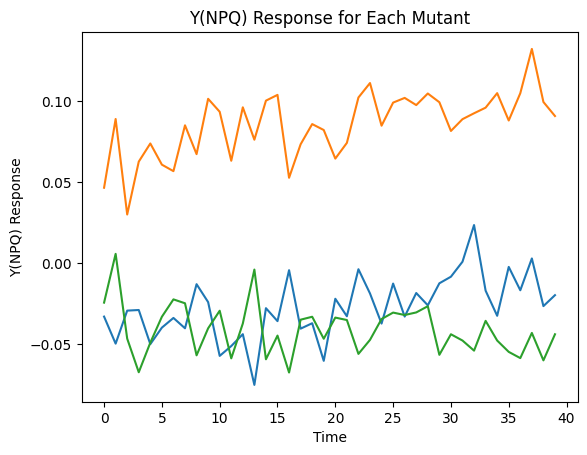

In [80]:
Data_analysis_func.plot_ynpq(data_norm_flagged[(data_norm_flagged['mutated_genes'] == genes_ok[90]) & (data_norm_flagged['light_regime'] == '20h_HL')])

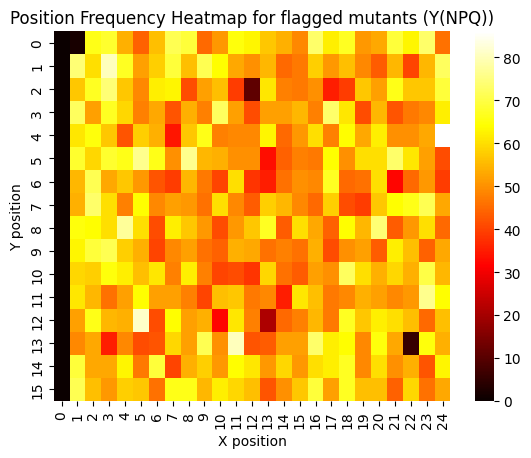

In [81]:
# position_counts = outliers_mean['well_id'].value_counts()
# position_counts = outliers_mean['well_id'].value_counts()/data_norm_ok['well_id'].value_counts()
position_counts = data_norm_flagged[data_norm_flagged['flag_ynpq'] == 'weird']['well_id'].value_counts()
# Extract x and y coordinates from positions
y = [ord(pos[0]) - ord('A') for pos in position_counts.index]  # Convert letters to numerical values for y-axis
x = [int(pos[1:]) for pos in position_counts.index]  # Extract numbers for x-axis

# Create a 2D grid to represent the lattice
max_x = max(x) + 1
max_y = max(y) + 1
frequency_grid = [[0] * max_x for _ in range(max_y)]

# Fill the frequency grid with position counts
for i, pos in enumerate(position_counts.index):
    frequency_grid[y[i]][x[i]] = position_counts[pos]

# Plot heatmap
sns.heatmap(frequency_grid, cmap='hot', fmt='d', cbar=True)

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Position Frequency Heatmap for flagged mutants (Y(NPQ))')

# Show plot
plt.show()

In [82]:
alpha = 0.05

In [83]:
Outlier_detection_v2.detect_outlier_mean_reduced_v2(data_norm_flagged, alpha)

/Users/samsongourevitch/Documents/Chlamy_Project_Github/Chlamy_project/Outlier_detection_v2.py:379: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

In [84]:
Outlier_detection_v2.detect_outliers_fv_fm_ynpq_end(data_norm_flagged, alpha)

/Users/samsongourevitch/Documents/Chlamy_Project_Github/Chlamy_project/Outlier_detection_v2.py:628: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_light['outlier_fv_fm_end'] = np.where(np.abs(data_light['fv_fm_end']) > quantile*std_fv_fm_end, True, False)
/Users/samsongourevitch/Documents/Chlamy_Project_Github/Chlamy_project/Outlier_detection_v2.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_light['outlier_ynpqend'] = np.where(np.abs(data_light['ynpqend']) > quantile*std_ynpqend, True, False

In [85]:
data_norm_ok_y2 = data_norm_flagged[data_norm_flagged['flag_y2'] == 'ok']
data_norm_ok_ynpq = data_norm_flagged[data_norm_flagged['flag_ynpq'] == 'ok']

In [86]:
data_norm_flagged['outlier_mean_reduced_v2_y2'].value_counts()

outlier_mean_reduced_v2_y2
True     32580
False    20943
Name: count, dtype: int64

In [87]:
data_norm_ok_y2['outlier_mean_reduced_v2_y2'].value_counts()

outlier_mean_reduced_v2_y2
True     17923
False    14256
Name: count, dtype: int64

In [88]:
data_norm_flagged['outlier_mean_reduced_v2_ynpq'].value_counts()

outlier_mean_reduced_v2_ynpq
False    30880
True     22643
Name: count, dtype: int64

In [89]:
data_norm_ok_ynpq['outlier_mean_reduced_v2_ynpq'].value_counts()

outlier_mean_reduced_v2_ynpq
False    21590
True     11023
Name: count, dtype: int64

In [90]:
print('The proportion of outliers among WT in the case of the mean reduced v2 for y2 with empirical cov is:', data_norm_flagged[(data_norm_flagged['outlier_mean_reduced_v2_y2'] == True) & (data_norm_flagged['mutant_ID'] == 'WT')].shape[0]/data_norm_flagged[data_norm_flagged['mutant_ID'] == 'WT'].shape[0])
print('The proportion of outliers among WT in the case of the mean reduced v2 for ynpq with empirical cov is:', data_norm_flagged[(data_norm_flagged['outlier_mean_reduced_v2_ynpq'] == True) & (data_norm_flagged['mutant_ID'] == 'WT')].shape[0]/data_norm_flagged[data_norm_flagged['mutant_ID'] == 'WT'].shape[0])

The proportion of outliers among WT in the case of the mean reduced v2 for y2 with empirical cov is: 0.08505680163122634
The proportion of outliers among WT in the case of the mean reduced v2 for ynpq with empirical cov is: 0.07573550830177687


In [91]:
print('The proportion of outliers among ok WT in the case of the mean reduced v2 for y2 with empirical cov is:', data_norm_ok_y2[(data_norm_ok_y2['outlier_mean_reduced_v2_y2'] == True) & (data_norm_ok_y2['mutant_ID'] == 'WT')].shape[0]/data_norm_ok_y2[data_norm_ok_y2['mutant_ID'] == 'WT'].shape[0])
print('The proportion of outliers among ok WT in the case of the mean reduced v2 for ynpq with empirical cov is:', data_norm_ok_ynpq[(data_norm_ok_ynpq['outlier_mean_reduced_v2_ynpq'] == True) & (data_norm_ok_ynpq['mutant_ID'] == 'WT')].shape[0]/data_norm_ok_ynpq[data_norm_ok_ynpq['mutant_ID'] == 'WT'].shape[0])

The proportion of outliers among ok WT in the case of the mean reduced v2 for y2 with empirical cov is: 0.040828951438292606
The proportion of outliers among ok WT in the case of the mean reduced v2 for ynpq with empirical cov is: 0.03760099440646364


In [92]:
print('The proportion of outliers among WT in the case of fv_fm for y2 with empirical cov is:', data_norm_flagged[(data_norm_flagged['outlier_fv_fm'] == True) & (data_norm_flagged['mutant_ID'] == 'WT')].shape[0]/data_norm_flagged[data_norm_flagged['mutant_ID'] == 'WT'].shape[0])
print('The proportion of outliers among WT in the case of fv_fm_end for y2 with empirical cov is:', data_norm_flagged[(data_norm_flagged['outlier_fv_fm_end'] == True) & (data_norm_flagged['mutant_ID'] == 'WT')].shape[0]/data_norm_flagged[data_norm_flagged['mutant_ID'] == 'WT'].shape[0])
print('The proportion of outliers among WT in the case of ynpqend for ynpq with empirical cov is:', data_norm_flagged[(data_norm_flagged['outlier_ynpqend'] == True) & (data_norm_flagged['mutant_ID'] == 'WT')].shape[0]/data_norm_flagged[data_norm_flagged['mutant_ID'] == 'WT'].shape[0])

The proportion of outliers among WT in the case of fv_fm for y2 with empirical cov is: 0.06961840955432566
The proportion of outliers among WT in the case of fv_fm_end for y2 with empirical cov is: 0.07602679871832217
The proportion of outliers among WT in the case of ynpqend for ynpq with empirical cov is: 0.07893970288377512


In [93]:
print('The proportion of outliers among ok WT in the case of fv_fm for y2 with empirical cov is:', data_norm_ok_y2[(data_norm_ok_y2['outlier_fv_fm'] == True) & (data_norm_ok_y2['mutant_ID'] == 'WT')].shape[0]/data_norm_ok_y2[data_norm_ok_y2['mutant_ID'] == 'WT'].shape[0])
print('The proportion of outliers among ok WT in the case of fv_fm_end for y2 with empirical cov is:', data_norm_ok_y2[(data_norm_ok_y2['outlier_fv_fm_end'] == True) & (data_norm_ok_y2['mutant_ID'] == 'WT')].shape[0]/data_norm_ok_y2[data_norm_ok_y2['mutant_ID'] == 'WT'].shape[0])
print('The proportion of outliers among ok WT in the case of ynpqend for ynpq with empirical cov is:', data_norm_ok_ynpq[(data_norm_ok_ynpq['outlier_ynpqend'] == True) & (data_norm_ok_ynpq['mutant_ID'] == 'WT')].shape[0]/data_norm_ok_ynpq[data_norm_ok_ynpq['mutant_ID'] == 'WT'].shape[0])

The proportion of outliers among ok WT in the case of fv_fm for y2 with empirical cov is: 0.04794308691617693
The proportion of outliers among ok WT in the case of fv_fm_end for y2 with empirical cov is: 0.05196412001237241
The proportion of outliers among ok WT in the case of ynpqend for ynpq with empirical cov is: 0.048166563082660034


In [94]:
Outlier_detection_v2.detect_diverging_outliers(data_norm_flagged, alpha, w=10, p=(1/2))

/Users/samsongourevitch/Documents/Chlamy_Project_Github/Chlamy_project/Outlier_detection_v2.py:600: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

In [95]:
data_norm_flagged[((data_norm_flagged['outlier_divergent_end_down_y2'] == True) | (data_norm_flagged['outlier_divergent_end_up_y2'] == True) | (data_norm_flagged['outlier_divergent_beg_up_y2'] == True) | (data_norm_flagged['outlier_divergent_beg_down_y2'] == True)) & (data_norm_flagged['mutant_ID'] == 'WT')].shape[0]/data_norm_flagged[data_norm_flagged['mutant_ID'] == 'WT'].shape[0]

0.015729682493445966

In [96]:
data_norm_flagged[((data_norm_flagged['outlier_divergent_end_down_ynpq'] == True) | (data_norm_flagged['outlier_divergent_end_up_ynpq'] == True) | (data_norm_flagged['outlier_divergent_beg_up_ynpq'] == True) | (data_norm_flagged['outlier_divergent_beg_down_ynpq'] == True)) & (data_norm_flagged['mutant_ID'] == 'WT')].shape[0]/data_norm_flagged[data_norm_flagged['mutant_ID'] == 'WT'].shape[0]

0.031168074570346635

In [81]:
pd.set_option('Display.max_columns', None)

In [82]:
data_norm_flagged[data_norm_flagged['outlier_divergent_end_down_y2'] == True].iloc[:5]

plate measurement start_date light_regime  dark_threshold  \
1742      2          M1 2023-10-18    1min-1min       17.221402   
1850      2          M1 2023-10-18    1min-1min       17.221402   
1899      2          M3 2023-10-20       20h_HL       19.047878   
1911      2          M3 2023-10-20       20h_HL       19.047878   
1934      2          M3 2023-10-20       20h_HL       19.047878   

      light_threshold  num_frames   i   j     fv_fm  mask_area      y2_1  \
1742        25.338585         164   9   7 -0.141820         29 -0.191304   
1850        25.338585         164  14   0  0.069591          4 -0.036973   
1899        24.634703          84   0   4  0.072098         25  0.082106   
1911        24.634703          84   0  16  0.011998         33  0.049501   
1934        24.634703          84   1  17 -0.052108         48 -0.079803   

          y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8  \
1742 -0.160594 -0.137119 -0.189034 -0.112806 -0.179611 -0.104060 -0.151021   
1850 -0.010698  0.062842 -0.091692 -0.005292  0.083602  0.091372  0.050276   
1899  0.084590  0.026110  0.045356  0.020938 -0.022514 -0.024103  0.012666   
1911  0.032389  0.017933  0.056465 -0.007285  0.020042 -0.007493  0.009665   
1934 -0.047675 -0.080847 -0.021161 -0.067424 -0.049679 -0.047463 -0.052842   

          y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15  \
1742 -0.128598 -0.119749 -0.171512 -0.191541 -0.098890 -0.153523 -0.150738   
1850 -0.008193  0.040737 -0.002130  0.054124  0.112670  0.033855 -0.068348   
1899 -0.035274 -0.033549 -0.031170  0.017037 -0.063624 -0.015209  0.000569   
1911 -0.024712  0.017893  0.012312  0.033839  0.019134  0.009521  0.011113   
1934 -0.069175 -0.028461 -0.040956 -0.054824 -0.022744 -0.035003 -0.042022   

         y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22  \
1742 -0.178540 -0.163919 -0.178982 -0.144119 -0.181583 -0.116940 -0.176617   
1850  0.122043  0.030790 -0.035835 -0.007665  0.036520 -0.027450  0.021062   
1899 -0.012879 -0.078740 -0.074404 -0.053870 -0.049765 -0.055725 -0.049872   
1911 -0.035026 -0.010150 -0.022701  0.000807 -0.028400 -0.040326 -0.016009   
1934 -0.086357 -0.082121 -0.060668 -0.023083 -0.055532 -0.055019 -0.015157   

         y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29  \
1742 -0.110726 -0.177974 -0.159516 -0.185287 -0.113331 -0.201636 -0.121463   
1850 -0.012769  0.044595 -0.132153  0.041413  0.115517 -0.009877  0.081721   
1899 -0.091075 -0.013537 -0.073281 -0.032599 -0.013757 -0.094855 -0.053397   
1911 -0.024656 -0.090285 -0.000074 -0.015169 -0.055240 -0.016709 -0.012636   
1934 -0.061071 -0.054987 -0.025073 -0.066861 -0.070458 -0.081710 -0.053374   

         y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36  \
1742 -0.131854 -0.145095 -0.216066 -0.113420 -0.187309 -0.175850 -0.175909   
1850  0.100895  0.015229 -0.050959  0.045772 -0.063288 -0.068439 -0.026928   
1899 -0.079106 -0.094676 -0.083109 -0.061782 -0.071170 -0.086764 -0.112937   
1911 -0.051252 -0.055951 -0.059948 -0.080337 -0.057621 -0.050972 -0.080343   
1934 -0.094240 -0.104639 -0.093108 -0.081242 -0.057981 -0.050067 -0.100638   

         y2_37     y2_38     y2_39     y2_40     y2_41     y2_42     y2_43  \
1742 -0.129453 -0.204938 -0.168843 -0.222078 -0.148617 -0.164085 -0.190609   
1850 -0.005534  0.026902  0.018934 -0.023719 -0.028592  0.034639  0.077494   
1899 -0.053025 -0.053458 -0.108908 -0.087409       NaN       NaN       NaN   
1911 -0.029653 -0.072597 -0.066390 -0.055478       NaN       NaN       NaN   
1934 -0.077837 -0.081831 -0.055137 -0.060820       NaN       NaN       NaN   

         y2_44     y2_45     y2_46     y2_47     y2_48     y2_49     y2_50  \
1742 -0.203073 -0.164379 -0.190558 -0.174862 -0.196020 -0.204865 -0.208763   
1850  0.006270 -0.004602  0.047205 -0.042536 -0.025624 -0.124965  0.030308   
1899       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1911       NaN      

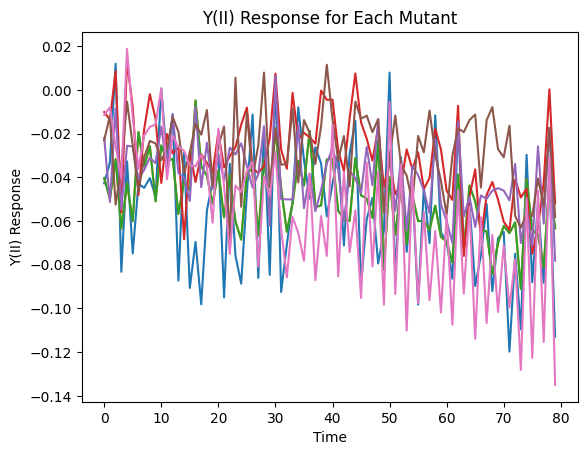

In [97]:
Data_analysis_func.plot_y2(data_norm_flagged[(data_norm_flagged['outlier_divergent_end_down_y2'] == True) & (data_norm_flagged['light_regime'] == '1min-1min')].iloc[90:97])

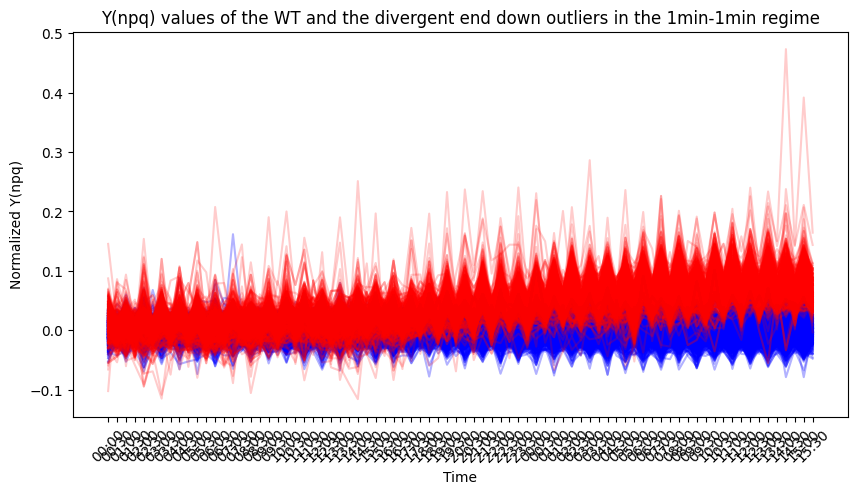

In [413]:
Data_analysis_func.plot_WT_outliers(data_norm_flagged, 'divergent_end_up', 'ynpq', '1min-1min', 100)

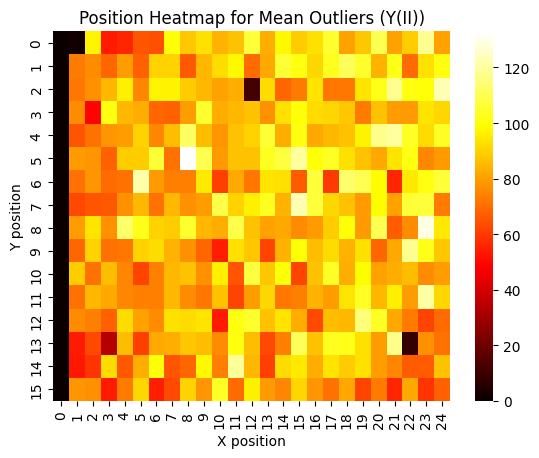

In [99]:
# position_counts = outliers_mean['well_id'].value_counts()
# position_counts = outliers_mean['well_id'].value_counts()/data_norm_ok['well_id'].value_counts()
position_counts = data_norm_flagged[data_norm_flagged['outlier_mean_reduced_v2_y2'] == True]['well_id'].value_counts()
# Extract x and y coordinates from positions
y = [ord(pos[0]) - ord('A') for pos in position_counts.index]  # Convert letters to numerical values for y-axis
x = [int(pos[1:]) for pos in position_counts.index]  # Extract numbers for x-axis

# Create a 2D grid to represent the lattice
max_x = max(x) + 1
max_y = max(y) + 1
frequency_grid = [[0] * max_x for _ in range(max_y)]

# Fill the frequency grid with position counts
for i, pos in enumerate(position_counts.index):
    frequency_grid[y[i]][x[i]] = position_counts[pos]

# Plot heatmap
sns.heatmap(frequency_grid, cmap='hot', fmt='d', cbar=True)

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Position Heatmap for Mean Outliers (Y(II))')

# Show plot
plt.show()

In [105]:
pd.set_option('Display.max_columns', None)

In [107]:
data[data['well_id'] == 'A01']

plate measurement start_date light_regime  dark_threshold  \
11812     99          M2 2023-12-02       20h_HL       54.740894   
41004     22          M3 2024-03-21       20h_ML      102.010603   
46773      1          M6 2024-04-05  10min-10min       51.238108   

       light_threshold  num_frames  i  j     fv_fm  mask_area      y2_1  \
11812        71.963451          84  0  0  0.656554          6  0.249980   
41004       173.109949          84  0  0  0.598124         11  0.391488   
46773        85.485174         164  0  0  0.617062          7  0.567785   

           y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8  \
11812  0.259067  0.240312  0.241012  0.164809  0.241303  0.213136  0.186686   
41004  0.413809  0.431871  0.426766  0.428978  0.428527  0.429403  0.422318   
46773  0.275432  0.276889  0.542198  0.561055  0.247418  0.244860  0.541515   

           y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15  \
11812  0.208668  0.195572  0.233996  0.215873  0.242330  0.202821  0.161046   
41004  0.410408  0.416288  0.407939  0.426203  0.417365  0.403021  0.409908   
46773  0.547697  0.238401  0.256907  0.555817  0.559877  0.263652  0.256420   

          y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22  \
11812  0.201452  0.165503  0.247795  0.199578  0.225083  0.158777  0.187055   
41004  0.416635  0.422261  0.397586  0.419529  0.411683  0.403529  0.396938   
46773  0.564061  0.550376  0.239555  0.245546  0.559828  0.537100  0.265479   

          y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29  \
11812  0.202984  0.216330  0.189077  0.192259  0.183706  0.213522  0.207709   
41004  0.397636  0.423710  0.392723  0.407044  0.419844  0.399857  0.411383   
46773  0.221792  0.511021  0.555683  0.275085  0.254247  0.542706  0.556576   

          y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36  \
11812  0.174291  0.179989  0.157329  0.166776  0.176897  0.202271  0.193754   
41004  0.385447  0.411196  0.404698  0.396620  0.401476  0.396861  0.401449   
46773  0.269736  0.235725  0.531019  0.524314  0.268538  0.253936  0.557303   

          y2_37     y2_38     y2_39     y2_40    y2_41     y2_42     y2_43  \
11812  0.200900  0.165982  0.185118  0.175865      NaN       NaN       NaN   
41004  0.389180  0.395121  0.396640  0.400955      NaN       NaN       NaN   
46773  0.567121  0.257981  0.244463  0.567946  0.56727  0.273776  0.250233   

          y2_44     y2_45     y2_46     y2_47     y2_48     y2_49     y2_50  \
11812       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
41004       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
46773  0.553906  0.568768  0.237975  0.233373  0.560101  0.537069  0.254693   

          y2_51     y2_52    y2_53     y2_54     y2_55     y2_56     y2_57  \
11812       NaN       NaN      NaN       NaN       NaN       NaN       NaN   
41004       NaN       NaN      NaN       NaN       NaN       NaN       NaN   
46773  0.262486  0.568275  0.55267  0.271923  0.240534  0.565324  0.535198   

          y2_58     y2_59     y2_60     y2_61     y2_62    y2_63    y2_64  \
11812       NaN       NaN       NaN       NaN       NaN      NaN      NaN   
41004       NaN       NaN       NaN       NaN       NaN      NaN      NaN   
46773  0.250597  0.231194  0.561078  0.559105  0.287146  0.26528  0.55188   

          y2_65     y2_66     y2_67     y2_68     y2_69     y2_70     y2_71  \
11812       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
41004       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
46773  0.564797  0.248913  0.253897  0.548638  0.547628  0.261581  0.210732   

          y2_72     y2_73     y2_74     y2_75     y2_76     y2_77     y2_78  \
11812       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
41004       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
46773  0.555405  0.551177  0.256084  0.250

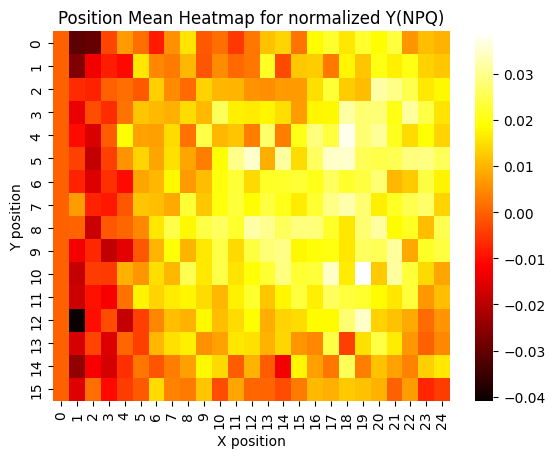

In [630]:
# get the average mean_ynpq for each well_id
mean_ynpq = data_norm.groupby('well_id')['mean_ynpq'].mean()
# Extract x and y coordinates from positions
y = [ord(pos[0]) - ord('A') for pos in mean_ynpq.index]  # Convert letters to numerical values for y-axis
x = [int(pos[1:]) for pos in mean_ynpq.index]  # Extract numbers for x-axis

max_x = max(x) + 1
max_y = max(y) + 1
frequency_grid = [[0] * max_x for _ in range(max_y)]

# Fill the frequency grid with position counts
for i, pos in enumerate(mean_ynpq.index):
    frequency_grid[y[i]][x[i]] = mean_ynpq[pos]

 # Plot heatmap
sns.heatmap(frequency_grid, cmap='hot', fmt='d', cbar=True)

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Position Mean Heatmap for normalized Y(NPQ)')

# Show plot
plt.show()   

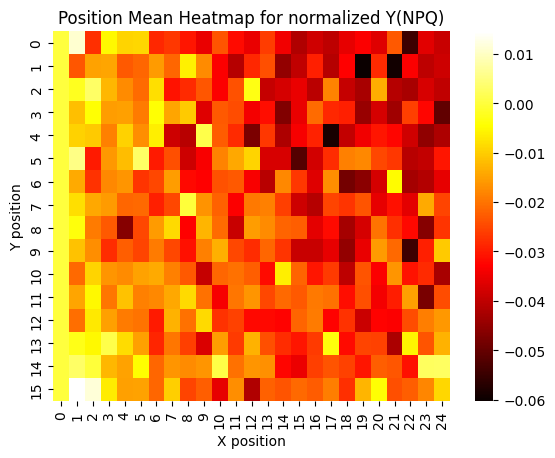

In [638]:
# get the average mean_ynpq for each well_id
mean_ynpq = data_norm.groupby('well_id')['mean_y2'].mean()
# Extract x and y coordinates from positions
y = [ord(pos[0]) - ord('A') for pos in mean_ynpq.index]  # Convert letters to numerical values for y-axis
x = [int(pos[1:]) for pos in mean_ynpq.index]  # Extract numbers for x-axis

max_x = max(x) + 1
max_y = max(y) + 1
frequency_grid = [[0] * max_x for _ in range(max_y)]

# Fill the frequency grid with position counts
for i, pos in enumerate(mean_ynpq.index):
    frequency_grid[y[i]][x[i]] = mean_ynpq[pos]

 # Plot heatmap
sns.heatmap(frequency_grid, cmap='hot', fmt='d', cbar=True)

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Position Mean Heatmap for normalized Y(NPQ)')

# Show plot
plt.show()   

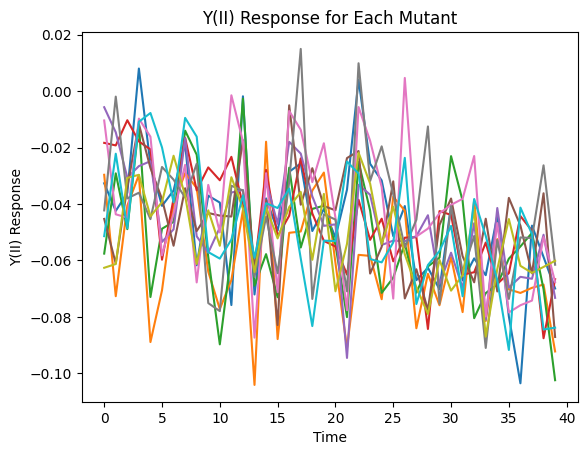

In [108]:
Data_analysis_func.plot_y2(data_norm_flagged[(data_norm_flagged['outlier_mean_reduced_v2_y2'] == True) & (data_norm_flagged['outlier_fv_fm'] == False) & (data_norm_flagged['flag_y2'] == 'ok') & (data_norm_flagged['mutated_genes_light_regime_count'] > 1) & (data_norm_flagged['light_regime'] == '20h_HL')].iloc[560:570])

In [114]:
data_norm_flagged_test = data_norm_flagged.copy()

In [122]:
# create a new column that contains the count of the outliers for each gene and light regime
outlier_types = data_norm_flagged.columns[data_norm_flagged.columns.str.startswith('outlier_')]
for outlier_type in outlier_types:
    data_norm_flagged_test[outlier_type + '_count'] = data_norm_flagged_test.groupby(['mutated_genes', 'light_regime'])[outlier_type].transform('sum')

In [128]:
data_norm_ok_y2 = data_norm_flagged[data_norm_flagged['flag_y2'] == 'ok']
data_norm_ok_ynpq = data_norm_flagged[data_norm_flagged['flag_ynpq'] == 'ok']

outlier_types = data_norm_flagged.columns[data_norm_flagged.columns.str.startswith('outlier_')]
outlier_types_y2 = data_norm_flagged.columns[(data_norm_ok_y2.columns.str.startswith('outlier_')) & (data_norm_ok_y2.columns.str.endswith('y2'))]
outlier_types_ynpq = data_norm_flagged.columns[(data_norm_ok_ynpq.columns.str.startswith('outlier_')) & (data_norm_ok_ynpq.columns.str.endswith('ynpq'))]

for outlier_type in outlier_types:
    data_norm_ok_y2[outlier_type + '_count'] = data_norm_ok_y2.groupby(['mutated_genes', 'light_regime'])[outlier_type].transform('sum')
    data_norm_ok_ynpq[outlier_type + '_count'] = data_norm_ok_ynpq.groupby(['mutated_genes', 'light_regime'])[outlier_type].transform('sum')

/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/2589655618.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_norm_ok_y2[outlier_type + '_count'] = data_norm_ok_y2.groupby(['mutated_genes', 'light_regime'])[outlier_type].transform('sum')
/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/2589655618.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_norm_ok_ynpq[outlier_type + '_count'] = data_norm_ok_ynpq.groupby(['mutated_genes', 'light_regime'])[outlier_type].tr

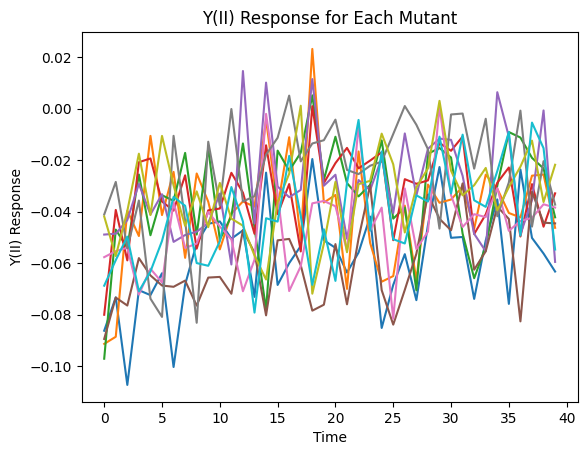

In [441]:
Data_analysis_func.plot_y2(good_mutants_beg_down.iloc[:10])

In [387]:
good_mutants_end_down[good_mutants_end_down['mutant_ID'] == good_mutants_end_down['mutant_ID'].unique()[0]]

plate measurement start_date light_regime  dark_threshold  \
808      2          M1 2023-10-18    1min-1min       17.221402   

     light_threshold  num_frames  i   j     fv_fm  mask_area      y2_1  \
808        25.338585         164  1  17 -0.020685         39 -0.065844   

         y2_2      y2_3      y2_4     y2_5      y2_6      y2_7      y2_8  \
808 -0.052197 -0.034863 -0.034086 -0.01549 -0.051045 -0.034723 -0.023867   

         y2_9     y2_10     y2_11     y2_12     y2_13    y2_14     y2_15  \
808 -0.039552 -0.016302 -0.039961 -0.038635 -0.058569 -0.04738 -0.052676   

       y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22  \
808 -0.01868 -0.045096 -0.031165 -0.028116 -0.052458 -0.059654 -0.048037   

        y2_23     y2_24     y2_25    y2_26     y2_27     y2_28     y2_29  \
808 -0.064918 -0.029158 -0.060039 -0.05262 -0.043008 -0.047065 -0.076751   

        y2_30     y2_31     y2_32    y2_33    y2_34     y2_35     y2_36  \
808 -0.033825 -0.019048 -0.068454 -0.03899 -0.06086 -0.082373 -0.029919   

        y2_37    y2_38     y2_39     y2_40     y2_41     y2_42     y2_43  \
808 -0.073377 -0.04453 -0.064367 -0.065567 -0.068814 -0.029598 -0.045285   

       y2_44   y2_45     y2_46     y2_47     y2_48     y2_49    y2_50  \
808 -0.07783 -0.0569 -0.055785 -0.072774 -0.031695 -0.063122 -0.05127   

        y2_51     y2_52     y2_53     y2_54     y2_55     y2_56     y2_57  \
808 -0.111994 -0.038115 -0.053871 -0.082078 -0.068244 -0.052515 -0.045353   

        y2_58     y2_59     y2_60     y2_61     y2_62    y2_63     y2_64  \
808 -0.075172 -0.065562 -0.076451 -0.043804 -0.048692 -0.07442 -0.053038   

        y2_65     y2_66     y2_67     y2_68     y2_69    y2_70     y2_71  \
808 -0.069109 -0.050138 -0.080118 -0.053399 -0.016607 -0.07071 -0.047613   

        y2_72     y2_73    y2_74     y2_75     y2_76    y2_77     y2_78  \
808 -0.040102 -0.067053 -0.04621 -0.057871 -0.044393 -0.07596 -0.046177   

        y2_79     y2_80    ynpq_1    ynpq_2    ynpq_3    ynpq_4   ynpq_5  \
808 -0.043873 -0.046072  0.050856  0.021175  0.028961  0.023139  0.02526   

       ynpq_6    ynpq_7    ynpq_8    ynpq_9   ynpq_10   ynpq_11   ynpq_12  \
808  0.035473  0.037825  0.024412  0.032655  0.001624  0.041185  0.030226   

      ynpq_13   ynpq_14   ynpq_15   ynpq_16   ynpq_17   ynpq_18   ynpq_19  \
808  0.066981  0.031537  0.040474  0.019778  0.041668  0.026374  0.027155   

      ynpq_20   ynpq_21   ynpq_22   ynpq_23   ynpq_24   ynpq_25   ynpq_26  \
808  0.038625  0.057259  0.034263  0.068013  0.040081  0.061105  0.041581   

      ynpq_27  ynpq_28   ynpq_29   ynpq_30   ynpq_31   ynpq_32   ynpq_33  \
808  0.039609  0.04232  0.069188  0.038108  0.039514  0.044964  0.026011   

      ynpq_34   ynpq_35   ynpq_36   ynpq_37   ynpq_38   ynpq_39  ynpq_40  \
808  0.036028  0.085536  0.026534  0.087195  0.030271  0.071726  0.04372   

      ynpq_41   ynpq_42   ynpq_43   ynpq_44   ynpq_45   ynpq_46   ynpq_47  \
808  0.081681  0.021986  0.052335  0.057889  0.058155  0.036453  0.064976   

     ynpq_48   ynpq_49   ynpq_50   ynpq_51   ynpq_52   ynpq_53   ynpq_54  \
808  0.03197  0.093979  0.045307  0.114027  0.039317  0.088483  0.077782   

      ynpq_55   ynpq_56   ynpq_57   ynpq_58  ynpq_59   ynpq_60   ynpq_61  \
808  0.099051  0.063258  0.074396  0.066422  0.08904  0.065083  0.079346   

      ynpq_62   ynpq_63   ynpq_64   ynpq_65   ynpq_66   ynpq_67   ynpq_68  \
808  0.051829  0.077061  0.055611  0.093672  0.056079  0.097903  0.054419   

      ynpq_69   ynpq_70   ynpq_71   ynpq_72   ynpq_73   ynpq_74   ynpq_75  \
808  0.079113  0.062967  0.065388  0.050914  0.101306  0.057573  0.106514   

      ynpq_76   ynpq_77   ynpq_78   ynpq_79   ynpq_80  measurement_time_0  \
808  0.051956  0.116635  0.054762  0.092759  0.060459 2023-10-18 10:46:26   

     measurement_time_1  measurement_time_2  measurement_time_3  \
808 2023-10-18 11:15:26 2023-10-18 11:16:27 2023-10-18 11:45:28   

     measurement_time_4  measurement_time_5  measurement_time_6

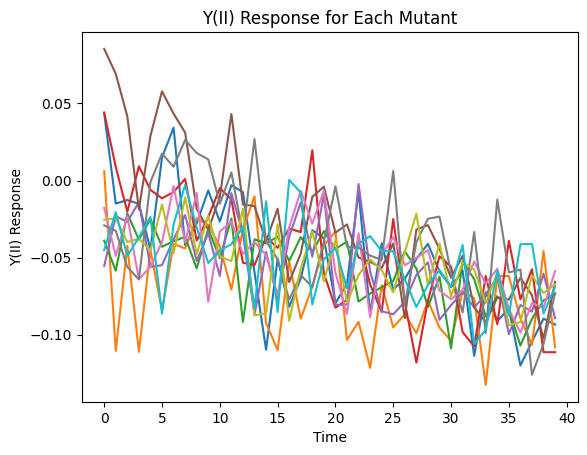

In [378]:
Data_analysis_func.plot_y2(good_mutants_end_down_sorted[good_mutants_end_down_sorted['light_regime'] == '20h_HL'].iloc[:10])

In [323]:
priority_mutants_y2 = data_norm_ok_y2[data_norm_ok_y2['mutated_genes_light_regime_count'] >= 2]
priority_mutants_ynpq = data_norm_ok_ynpq[data_norm_ok_ynpq['mutated_genes_light_regime_count'] >= 2]

fluctuating_light_regimes = ['30s-30s', '1min-1min', '10min-10min', '2h-2h']
continuous_light_regimes = ['20h_ML', '20h_HL']

def filter_mutants(group):
    # Check if any outlier type has at least 2 True counts for fluctuating light regimes
    has_at_least_2_true_fluctuating = np.any(group.loc[group['light_regime'].isin(['30s-30s', '1min-1min', '10min-10min', '2h-2h']), outlier_types_y2 + '_count'] >= 2)

    has_at_least_2_true_continuous = np.any(group.loc[group['light_regime'].isin(['20h_ML', '20h_HL']), outlier_types_y2 + '_count'] >= 2)

    is_one_of_the_true_fluctuating = np.any(group.loc[group['light_regime'].isin(fluctuating_light_regimes), outlier_types_y2] == True)

    is_one_of_the_true_continuous = np.any(group.loc[group['light_regime'].isin(continuous_light_regimes), outlier_types_y2] == True)
    
    # Check if all outlier types have 0 True counts for continuous light regimes
    has_all_zero_continuous = np.all(group.loc[group['light_regime'].isin(['20h_ML', '20h_HL']), outlier_types_y2 + '_count'] == 0)

    has_all_zero_fluctuating = np.all(group.loc[group['light_regime'].isin(['30s-30s', '1min-1min', '10min-10min', '2h-2h']), outlier_types_y2 + '_count'] == 0)

    # Check if the group has at least of the continuous light regimes
    has_at_least_one_continuous = np.any(group['light_regime'].isin(['20h_ML', '20h_HL']))

    has_at_least_one_fluctuating = np.any(group['light_regime'].isin(['30s-30s', '1min-1min', '10min-10min', '2h-2h']))
    
    return (has_at_least_2_true_fluctuating and has_all_zero_continuous and has_at_least_one_continuous and is_one_of_the_true_fluctuating) | (has_at_least_2_true_continuous and has_all_zero_fluctuating and has_at_least_one_fluctuating and is_one_of_the_true_continuous)

# Apply the filter function to each group defined by 'mutated_genes'
filtered_genes_y2 = priority_mutants_y2.groupby('mutated_genes').apply(filter_mutants)
selected_genes_ids_y2 = filtered_genes_y2[filtered_genes_y2].index.get_level_values('mutated_genes').tolist()
priority_mutants_y2_filtered = priority_mutants_y2[priority_mutants_y2['mutated_genes'].isin(selected_genes_ids_y2)]

filtered_genes_ynpq = priority_mutants_ynpq.groupby('mutated_genes').apply(filter_mutants)
selected_genes_ids_ynpq = filtered_genes_ynpq[filtered_genes_ynpq].index.get_level_values('mutated_genes').tolist()
priority_mutants_ynpq_filtered = priority_mutants_ynpq[priority_mutants_ynpq['mutated_genes'].isin(selected_genes_ids_ynpq)]

/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/3424642580.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_genes_y2 = priority_mutants_y2.groupby('mutated_genes').apply(filter_mutants)
/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/3424642580.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_genes_ynpq = priority_mutants_ynpq.groupby('mutated_gene

In [469]:
priority_mutants_y2_end_down = data_norm_ok_y2[data_norm_ok_y2['mutated_genes_light_regime_count'] >= 2]
priority_mutants_y2_end_down_filtered = priority_mutants_y2_end_down[priority_mutants_y2_end_down['outlier_divergent_end_down_y2_count'] >= 2]

priority_mutants_y2_end_up = data_norm_ok_y2[data_norm_ok_y2['mutated_genes_light_regime_count'] >= 2]
priority_mutants_y2_end_up_filtered = priority_mutants_y2_end_up[priority_mutants_y2_end_up['outlier_divergent_end_up_y2_count'] >= 2]

priority_mutants_y2_beg_up = data_norm_ok_y2[data_norm_ok_y2['mutated_genes_light_regime_count'] >= 2]
priority_mutants_y2_beg_up_filtered = priority_mutants_y2_beg_up[priority_mutants_y2_beg_up['outlier_divergent_beg_up_y2_count'] >= 2]

priority_mutants_y2_beg_down = data_norm_ok_y2[data_norm_ok_y2['mutated_genes_light_regime_count'] >= 2]
priority_mutants_y2_beg_down_filtered = priority_mutants_y2_beg_down[priority_mutants_y2_beg_down['outlier_divergent_beg_down_y2_count'] >= 2]

In [470]:
good_mutants_end_down = priority_mutants_y2_end_down_filtered[priority_mutants_y2_end_down_filtered['outlier_divergent_end_down_y2'] == True]
good_mutants_end_up = priority_mutants_y2_end_up_filtered[priority_mutants_y2_end_up_filtered['outlier_divergent_end_up_y2'] == True]
good_mutants_beg_up = priority_mutants_y2_beg_up_filtered[priority_mutants_y2_beg_up_filtered['outlier_divergent_beg_up_y2'] == True]
good_mutants_beg_down = priority_mutants_y2_beg_down_filtered[priority_mutants_y2_beg_down_filtered['outlier_divergent_beg_down_y2'] == True]

In [471]:
len(good_mutants_end_down_sorted), len(good_mutants_end_up_sorted), len(good_mutants_beg_up_sorted), len(good_mutants_beg_down_sorted)

(552, 98, 24, 76)

In [472]:
print('There are ', len(priority_mutants_y2), ' mutants that are ok with at least two genes representant for y2')

print('Among those ', len(priority_mutants_y2[(priority_mutants_y2['outlier_mean_reduced_v2_y2'] == True) | (priority_mutants_y2['outlier_divergent_end_down_y2'] == True) | (priority_mutants_y2['outlier_divergent_end_up_y2'] == True) | (priority_mutants_y2['outlier_divergent_beg_down_y2'] == True) | (priority_mutants_y2['outlier_divergent_beg_up_y2'] == True)]), ' mutants have at least one outlier for y2')

print('Among those ', len(selected_genes_ids_y2), ' genes have at least 2 of outliers for fluctuating light regimes and 0 for continuous light regimes or the opposite')

There are  26364  mutants that are ok with at least two genes representant for y2
Among those  14318  mutants have at least one outlier for y2
Among those  85  mutants have at least 2 of outliers for fluctuating light regimes and 0 for continuous light regimes or the opposite


In [473]:
print('There are ', len(priority_mutants_ynpq), ' mutants that are ok with at least two genes representant for ynpq')

print('Among those ', len(priority_mutants_ynpq[(priority_mutants_ynpq['outlier_mean_reduced_v2_ynpq'] == True) | (priority_mutants_ynpq['outlier_divergent_end_down_ynpq'] == True) | (priority_mutants_ynpq['outlier_divergent_end_up_ynpq'] == True) | (priority_mutants_ynpq['outlier_divergent_beg_down_ynpq'] == True) | (priority_mutants_ynpq['outlier_divergent_beg_up_ynpq'] == True)]), ' mutants have at least one outlier for ynpq')

print('Among those ', len(selected_genes_ids_ynpq), 'genes have at least 2 of outliers for fluctuating light regimes and 0 for continuous light regimes or the opposite')

There are  26798  mutants that are ok with at least two genes representant for ynpq
Among those  9865  mutants have at least one outlier for ynpq
Among those  55  mutants have at least 2 of outliers for fluctuating light regimes and 0 for continuous light regimes or the opposite


In [393]:
overlap_genes = set(selected_genes_ids_y2).intersection(set(selected_genes_ids_ynpq))

In [474]:
priority_mutants_y2_filtered['final_mutated_genes_light_regime_count'] = priority_mutants_y2_filtered.groupby(['mutated_genes', 'light_regime'])['mutant_ID'].transform('count')
good_mutants_end_down['final_mutated_genes_light_regime_count'] = good_mutants_end_down.groupby(['mutated_genes', 'light_regime'])['mutant_ID'].transform('count')
good_mutants_end_up['final_mutated_genes_light_regime_count'] = good_mutants_end_up.groupby(['mutated_genes', 'light_regime'])['mutant_ID'].transform('count')
good_mutants_beg_up['final_mutated_genes_light_regime_count'] = good_mutants_beg_up.groupby(['mutated_genes', 'light_regime'])['mutant_ID'].transform('count')
good_mutants_beg_down['final_mutated_genes_light_regime_count'] = good_mutants_beg_down.groupby(['mutated_genes', 'light_regime'])['mutant_ID'].transform('count')

/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/2462610305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priority_mutants_y2_filtered['final_mutated_genes_light_regime_count'] = priority_mutants_y2_filtered.groupby(['mutated_genes', 'light_regime'])['mutant_ID'].transform('count')
/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/2462610305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_mutants_end_down['final_mutated_genes_light_regime_count'] = good_mutants_

In [475]:
priority_mutants_y2_filtered['mutant_ratio'] = priority_mutants_y2_filtered['final_mutated_genes_light_regime_count']/priority_mutants_y2_filtered['mutated_genes_light_regime_count']
good_mutants_end_down['mutant_ratio'] = good_mutants_end_down['final_mutated_genes_light_regime_count']/good_mutants_end_down['mutated_genes_light_regime_count']
good_mutants_end_up['mutant_ratio'] = good_mutants_end_up['final_mutated_genes_light_regime_count']/good_mutants_end_up['mutated_genes_light_regime_count']
good_mutants_beg_up['mutant_ratio'] = good_mutants_beg_up['final_mutated_genes_light_regime_count']/good_mutants_beg_up['mutated_genes_light_regime_count']
good_mutants_beg_down['mutant_ratio'] = good_mutants_beg_down['final_mutated_genes_light_regime_count']/good_mutants_beg_down['mutated_genes_light_regime_count']

/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/4038416617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priority_mutants_y2_filtered['mutant_ratio'] = priority_mutants_y2_filtered['final_mutated_genes_light_regime_count']/priority_mutants_y2_filtered['mutated_genes_light_regime_count']
/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/4038416617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_mutants_end_down['mutant_ratio'] = good_mutants_end_down['final_muta

In [478]:
good_mutants_end_down_sorted['mutant_ratio'].value_counts()

mutant_ratio
0.666667    142
1.000000    107
0.500000     82
0.400000     36
0.333333     36
0.222222     26
0.285714     22
0.600000     12
0.166667     10
0.181818     10
0.750000      9
0.250000      8
0.214286      7
0.200000      7
0.100000      6
0.428571      6
0.800000      4
0.160000      4
0.272727      3
0.375000      3
0.142857      2
0.080000      2
0.068966      2
0.153846      2
0.004505      2
0.000000      2
Name: count, dtype: int64

In [477]:
priority_mutants_y2_filtered_sorted = priority_mutants_y2_filtered.sort_values(by='mean_reduced_v2_y2')
good_mutants_end_down_sorted = good_mutants_end_down.sort_values(by='sum_end_down_y2', ascending=False)
good_mutants_end_up_sorted = good_mutants_end_up.sort_values(by='sum_end_up_y2', ascending=False)
good_mutants_beg_up_sorted = good_mutants_beg_up.sort_values(by='sum_beg_up_y2', ascending=False)
good_mutants_beg_down_sorted = good_mutants_beg_down.sort_values(by='sum_beg_down_y2', ascending=False)

In [479]:
final_list_y2_specific = priority_mutants_y2_filtered_sorted[priority_mutants_y2_filtered_sorted['mutant_ratio'] > 0.65]
final_mutants_end_down = good_mutants_end_down_sorted[good_mutants_end_down_sorted['mutant_ratio'] > 0.65]
final_mutants_end_up = good_mutants_end_up_sorted[good_mutants_end_up_sorted['mutant_ratio'] > 0.65]
final_mutants_beg_up = good_mutants_beg_up_sorted[good_mutants_beg_up_sorted['mutant_ratio'] > 0.65]
final_mutants_beg_down = good_mutants_beg_down_sorted[good_mutants_beg_down_sorted['mutant_ratio'] > 0.65]

In [525]:
pd.set_option('Display.max_rows', 10)

In [521]:
data_norm_flagged[(data_norm_flagged['mutated_genes'] == 'Cre10.g444000') & (data_norm_flagged['light_regime'] == '1min-1min' )]

plate measurement start_date light_regime  dark_threshold  light_threshold  num_frames   i   j     fv_fm  mask_area      y2_1      y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8      y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15     y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22     y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29     y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36     y2_37     y2_38     y2_39     y2_40     y2_41     y2_42     y2_43     y2_44     y2_45     y2_46     y2_47     y2_48     y2_49     y2_50     y2_51     y2_52     y2_53     y2_54     y2_55     y2_56     y2_57     y2_58     y2_59     y2_60     y2_61     y2_62     y2_63     y2_64     y2_65     y2_66     y2_67     y2_68     y2_69     y2_70     y2_71     y2_72     y2_73     y2_74     y2_75     y2_76     y2_77     y2_78     y2_79     y2_80    ynpq_1    ynpq_2    ynpq_3    ynpq_4    ynpq_5    ynpq_6    ynpq_7  \
2393       3          M1 2023-10-24    1min-1min       18.438145        26.253667         164   0  10 -0.025264         28 -0.052208 -0.002080 -0.009660 -0.036505 -0.049131  0.004932 -0.046975 -0.029855 -0.039638 -0.051963 -0.046006 -0.024296 -0.021882 -0.018193 -0.060203 -0.038279 -0.030271 -0.015151 -0.068544 -0.006468 -0.097380 -0.008590 -0.057505 -0.027174 -0.016308 -0.012965 -0.012769 -0.050485 -0.072830 -0.030037  0.001332 -0.050507 -0.031928 -0.042736 -0.044328 -0.020204 -0.047376 -0.017846 -0.081723 -0.051873 -0.040829 -0.002883 -0.036464 -0.032716 -0.037992 -0.032779 -0.050301 -0.016820 -0.040600 -0.022432 -0.034084 -0.055302 -0.052345 -0.032943 -0.026276 -0.022784 -0.006086 -0.030631  0.021414 -0.052076 -0.048158 -0.044294 -0.043708 -0.014616 -0.009551 -0.017180  0.025853 -0.019571 -0.040181 -0.032442  0.006666 -0.016771 -0.005842 -0.032867 -0.022943 -0.039503  0.007143 -0.050085 -0.010780 -0.049176 -0.007368 -0.021194 -0.035153 -0.007416  0.002220 -0.031510 -0.003317   
20313     12          M1 2024-01-25    1min-1min       18.069142        25.799415         164   2   5  0.049951         49 -0.038922  0.028472 -0.056371  0.023126 -0.031313  0.036191 -0.056940  0.016109 -0.067648  0.015623 -0.056973  0.015293 -0.057319  0.020164 -0.058199  0.010832 -0.055260  0.006518 -0.057635  0.016777 -0.077605  0.000689 -0.059599 -0.000973 -0.052396  0.005075 -0.033957  0.003591 -0.061715  0.005697 -0.087781  0.013824 -0.062941 -0.007662 -0.073456 -0.006119 -0.065287 -0.001426 -0.081228 -0.019593 -0.083406 -0.017947 -0.076047 -0.010711 -0.058963 -0.015929 -0.069777 -0.024163 -0.093106 -0.044980 -0.066903 -0.033934 -0.083216 -0.023710 -0.078642 -0.034099 -0.085915 -0.049973 -0.096653 -0.051266 -0.075004 -0.032500 -0.114078 -0.059691 -0.103577 -0.044213 -0.078588 -0.036467 -0.121078 -0.060633 -0.092640 -0.070409 -0.112611 -0.060376 -0.108043 -0.045343 -0.103670 -0.063231 -0.127127 -0.070793  0.049461  0.001757  0.063418 -0.000044  0.037790 -0.015390  0.058931   
20593     12          M1 2024-01-25    1min-1min       18.069142        25.799415         164  12   7 -0.058444         42 -0.069891 -0.054347 -0.048860 -0.055595 -0.056905 -0.053564 -0.045110 -0.050119 -0.086369 -0.051869 -0.050285 -0.043466 -0.068207 -0.054658 -0.102910 -0.085697 -0.064203 -0.061866 -0.041980 -0.072343 -0.083179 -0.086814 -0.085790 -0.072080 -0.086881 -0.078296 -0.067787 -0.075588 -0.067218 -0.066853 -0.051974 -0.052114 -0.092022 -0.078769 -0.073829 -0.066247 -0.079006 -0.072246 -0.065494 -0.057606 -0.081070 -0.076087 -0.092897 -0.067136 -0.056459 -0.076084 -0.062623 -0.087003 -0.051817 -0.068577 -0.078562 -0.077388 -0.076876 -0.077478 -0.087122 -0.066592 -0.053714 -0.086105 -0.047532 -0.062759 -0.043802 -0.056212 -0.063599 -0.098251 -0.081936 -0.074059 -0.073156 -0.078245 -0.066193 -0.108079 -0.059683 -0.073795 -0.084570 -0.062293 -0.045803 -0.072993 -0.084959 -0.088411 -0.056548 -0.079218  0.003775 -0.013421 -0.013529 -0.020535 -0.013452 -0.016183 -0.017204   
26529     15          M

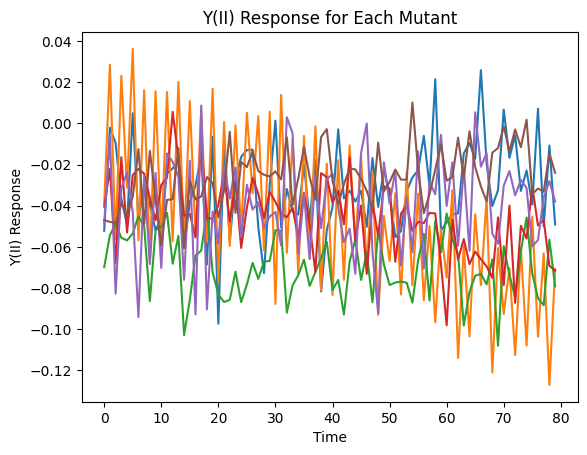

In [520]:
Data_analysis_func.plot_y2(data_norm_flagged[(data_norm_flagged['mutated_genes'] == 'Cre10.g444000') & (data_norm_flagged['light_regime'] == '1min-1min' )])

In [510]:
good_mutants_end_down[good_mutants_end_down['mutated_genes'] == 'Cre10.g444000']

plate measurement start_date light_regime  dark_threshold  light_threshold  num_frames  i   j     fv_fm  mask_area      y2_1      y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8      y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15     y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22     y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29     y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36     y2_37     y2_38     y2_39     y2_40     y2_41     y2_42     y2_43     y2_44     y2_45     y2_46     y2_47     y2_48     y2_49     y2_50     y2_51     y2_52     y2_53     y2_54     y2_55     y2_56     y2_57     y2_58     y2_59     y2_60     y2_61     y2_62     y2_63     y2_64     y2_65     y2_66     y2_67     y2_68     y2_69     y2_70     y2_71     y2_72     y2_73     y2_74     y2_75     y2_76     y2_77     y2_78     y2_79     y2_80    ynpq_1    ynpq_2    ynpq_3    ynpq_4    ynpq_5    ynpq_6    ynpq_7  \
28274     15          M5 2024-02-16  10min-10min       21.643070         31.48362         164  0  21 -0.015382         42 -0.020839 -0.030436 -0.054952 -0.025491 -0.041356 -0.040398 -0.069914 -0.030442 -0.016711 -0.054606 -0.057673 -0.029159 -0.033781 -0.066232 -0.029177 -0.034647 -0.023646 -0.043088 -0.069178 -0.044542 -0.012301 -0.053002 -0.038054 -0.036125 -0.026969 -0.039933 -0.063194 -0.039977 -0.032530 -0.088350 -0.057897 -0.027630 -0.036767 -0.059653 -0.095782 -0.042196 -0.023352 -0.046628 -0.060926 -0.037974 -0.043258 -0.046730 -0.059219 -0.039871 -0.035864 -0.087637 -0.073748 -0.069383 -0.031959 -0.073939 -0.066546 -0.037808 -0.033778 -0.062279 -0.077050 -0.052643 -0.048133 -0.088296 -0.030706 -0.047911 -0.056389 -0.064630 -0.059840 -0.049494 -0.044081 -0.076771 -0.077850 -0.055760 -0.034086 -0.098982 -0.090879 -0.040255 -0.062576 -0.055380 -0.100900 -0.047517 -0.064136 -0.100849 -0.089148 -0.072124  0.026926  0.083521  0.088082  0.027175  0.035314  0.082346  0.101716   
37734     17          M6 2024-03-12  10min-10min       16.514875         29.67505         164  0   9 -0.040989         45 -0.045751 -0.037146 -0.035294 -0.047507 -0.050924 -0.029552 -0.050239 -0.039664 -0.019522 -0.035630 -0.049858 -0.031827 -0.041697 -0.015741 -0.042544 -0.038718 -0.047765 -0.071769 -0.038828 -0.050957 -0.042335 -0.048291 -0.036024 -0.041002 -0.027123 -0.049284 -0.039192 -0.041477 -0.063788 -0.051672 -0.035396 -0.036897 -0.037219 -0.043195 -0.040337 -0.045392 -0.017342 -0.068347 -0.057244 -0.052895 -0.042234 -0.001264 -0.022913 -0.042035 -0.040257 -0.014781 -0.028778 -0.046526 -0.028710 -0.061953 -0.011961 -0.045213 -0.058294  0.001598 -0.044251 -0.036681 -0.035495 -0.010038 -0.052287 -0.027806 -0.047146 -0.031726 -0.044941 -0.055618 -0.052528 -0.003901 -0.016711 -0.030596 -0.047301 -0.039702 -0.026851 -0.042788 -0.041878 -0.053747 -0.021561 -0.046846 -0.033040 -0.032092 -0.018952 -0.036968 -0.000545 -0.035168 -0.031277  0.001655 -0.005447 -0.041825 -0.022109   

         ynpq_8   ynpq_9   ynpq_10   ynpq_11   ynpq_12   ynpq_13   ynpq_14   ynpq_15   ynpq_16   ynpq_17   ynpq_18   ynpq_19   ynpq_20  ynpq_21   ynpq_22   ynpq_23   ynpq_24   ynpq_25   ynpq_26   ynpq_27   ynpq_28   ynpq_29   ynpq_30   ynpq_31   ynpq_32   ynpq_33   ynpq_34   ynpq_35   ynpq_36   ynpq_37   ynpq_38   ynpq_39   ynpq_40   ynpq_41   ynpq_42   ynpq_43   ynpq_44   ynpq_45   ynpq_46   ynpq_47   ynpq_48   ynpq_49   ynpq_50   ynpq_51   ynpq_52   ynpq_53   ynpq_54   ynpq_55   ynpq_56   ynpq_57   ynpq_58   ynpq_59   ynpq_60   ynpq_61   ynpq_62   ynpq_63   ynpq_64   ynpq_65   ynpq_66   ynpq_67   ynpq_68   ynpq_69   ynpq_70   ynpq_71   ynpq_72   ynpq_73   ynpq_74   ynpq_75   ynpq_76   ynpq_77   ynpq_78   ynpq_79   ynpq_80  measurement_time_0  measurement_time_1  measurement_time_2  measurement_time_3  measurement_time_4  measurement_time_5  measurement_time_6  measurement_time_7  measurement_time_8  measurement_time_9 measurement_time_10 measurement_time_11 measurement_time_12  \
28274  0.028449  0.02422

In [541]:
final_genes_specific_y2 = final_list_y2_specific['mutated_genes'].unique()
final_genes_end_down_y2 = final_mutants_end_down['mutated_genes'].unique()
final_genes_end_up_y2 = final_mutants_end_up['mutated_genes'].unique()
final_genes_beg_up_y2 = final_mutants_beg_up['mutated_genes'].unique()
final_genes_beg_down_y2 = final_mutants_beg_down['mutated_genes'].unique()

final_list_y2_specific_all_mutants = data_norm_flagged[data_norm_flagged['mutated_genes'].isin(final_genes_specific_y2)]
final_mutants_end_down_all_mutants = data_norm_flagged[data_norm_flagged['mutated_genes'].isin(final_genes_end_down_y2)]
final_mutants_end_up_all_mutants = data_norm_flagged[data_norm_flagged['mutated_genes'].isin(final_genes_end_up_y2)]
final_mutants_beg_up_all_mutants = data_norm_flagged[data_norm_flagged['mutated_genes'].isin(final_genes_beg_up_y2)]
final_mutants_beg_down_all_mutants = data_norm_flagged[data_norm_flagged['mutated_genes'].isin(final_genes_beg_down_y2)]

In [544]:
len(final_list_y2_specific)

800

In [542]:
len(final_list_y2_specific_all_mutants)

1573

In [545]:
# get all the mutants from data_norm_flagged that have 'Cre10.g444000' as a mutated_genes 

special_mutants = data_norm_flagged[data_norm_flagged['mutated_genes'] == 'Cre10.g444000']

# Define a function to convert integer to corresponding letter (e.g., 0 -> 'A', 1 -> 'B', ...)
def int_to_letter(num):
    return chr(ord('A') + num)

# Add a 'source_df' column to each DataFrame to identify its source
final_list_y2_specific['source_df'] = 'light_specific_y2'
final_mutants_end_down['source_df'] = 'mutants_end_down_y2'
final_mutants_end_up['source_df'] = 'mutants_end_up_y2'
final_mutants_beg_down['source_df'] = 'mutants_beg_down_y2'
final_mutants_beg_up['source_df'] = 'mutants_beg_up_y2'
special_mutants['source_df'] = 'special_mutants_y2'

final_list_y2_specific_all_mutants['source_df'] = 'light_specific_y2'
final_mutants_end_down_all_mutants['source_df'] = 'mutants_end_down_y2'
final_mutants_end_up_all_mutants['source_df'] = 'mutants_end_up_y2'
final_mutants_beg_down_all_mutants['source_df'] = 'mutants_beg_down_y2'
final_mutants_beg_up_all_mutants['source_df'] = 'mutants_beg_up_y2'

# Concatenate the DataFrames vertically
combined_df = pd.concat([
    final_list_y2_specific,
    final_mutants_end_down,
    final_mutants_end_up,
    final_mutants_beg_down,
    final_mutants_beg_up,
    special_mutants
], ignore_index=True)

combined_df_all_mutants = pd.concat([
    final_list_y2_specific_all_mutants,
    final_mutants_end_down_all_mutants,
    final_mutants_end_up_all_mutants,
    final_mutants_beg_down_all_mutants,
    final_mutants_beg_up_all_mutants,
    special_mutants
], ignore_index=True)

# Convert the 'i' column to corresponding letters
combined_df['i (converted to letter)'] = combined_df['i'].apply(int_to_letter)
combined_df['j'] = combined_df['j'] + 1

combined_df_all_mutants['i (converted to letter)'] = combined_df_all_mutants['i'].apply(int_to_letter)
combined_df_all_mutants['j'] = combined_df_all_mutants['j'] + 1

# Select the desired columns for the final DataFrame
final_df = combined_df
final_df_all_mutants = combined_df_all_mutants
final_df_for_Carolyne = combined_df[['mutant_ID', 'mutated_genes', 'plate', 'i (converted to letter)', 'j', 'source_df']]
final_df_for_Carolyne_all_mutants = combined_df_all_mutants[['mutant_ID', 'mutated_genes', 'plate', 'i (converted to letter)', 'j', 'source_df']]

/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/4247133441.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_list_y2_specific['source_df'] = 'light_specific_y2'
/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/4247133441.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_mutants_end_down['source_df'] = 'mutants_end_down_y2'
/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/4247133441.py:12: SettingWithCopyWarning: 
A value is trying to be set 

In [549]:
final_df_for_Carolyne.drop_duplicates(inplace=True)
final_df_for_Carolyne_all_mutants.drop_duplicates(inplace=True)

/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/129730588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_for_Carolyne.drop_duplicates(inplace=True)
/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/129730588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_for_Carolyne_all_mutants.drop_duplicates(inplace=True)


In [550]:
# keep only the first mutant_ID when there are multiple ones
final_df_for_Carolyne.drop_duplicates(subset=['mutant_ID'], inplace=True)
final_df_for_Carolyne_all_mutants.drop_duplicates(subset=['mutant_ID'], inplace=True)

/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/3080859147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_for_Carolyne.drop_duplicates(subset=['mutant_ID'], inplace=True)
/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/3080859147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_for_Carolyne_all_mutants.drop_duplicates(subset=['mutant_ID'], inplace=True)


In [552]:
final_df_for_Carolyne_all_mutants

mutant_ID  mutated_genes  plate i (converted to letter)   j           source_df
0     LMJ.RY0402.062549  Cre09.g394251      2                       A   6   light_specific_y2
1     LMJ.RY0402.061906  Cre08.g384150      2                       A  23   light_specific_y2
2     LMJ.RY0402.065234  Cre08.g379800      2                       B   3   light_specific_y2
3     LMJ.RY0402.068402  Cre10.g437300      2                       B   4   light_specific_y2
4     LMJ.RY0402.068880  Cre01.g040250      2                       B  15   light_specific_y2
...                 ...            ...    ...                     ...  ..                 ...
3976  LMJ.RY0402.209920  Cre10.g444000     12                       C   6  special_mutants_y2
3977  LMJ.RY0402.217896  Cre10.g444000     12                       M   8  special_mutants_y2
3984  LMJ.RY0402.252269  Cre10.g444000     15                       A  22  special_mutants_y2
3990  LMJ.RY0402.134589  Cre10.g444000     18                       D  20  special_mutants_y2
3996  LMJ.RY0402.064049  Cre10.g444000     17                       A  10  special_mutants_y2

[655 rows x 6 columns]

In [554]:
final_df.to_csv('final_mutants_05_14_2024.csv')
final_df_for_Carolyne.to_csv('final_mutants_for_screen_05_14_2024.csv')

final_df_all_mutants.to_csv('final_mutants_all_mutants_05_14_2024.csv')
final_df_for_Carolyne_all_mutants.to_csv('final_mutants_for_screen_all_mutants_05_14_2024.csv')

In [539]:
len(final_mutants_end_down['mutant_ID'].unique()), len(final_mutants_end_up['mutant_ID'].unique()), len(final_mutants_beg_up['mutant_ID'].unique()), len(final_mutants_beg_down['mutant_ID'].unique())

(221, 46, 18, 23)

In [482]:
len(final_list_y2_specific['mutant_ID'].unique())

252

In [ ]:
final_list_y2_specific['mutant_ID'].unique()[0]

In [488]:
pd.set_option('Display.max_columns', None)

In [489]:
final_list_y2_specific

plate measurement start_date light_regime  dark_threshold  light_threshold  num_frames   i   j     fv_fm  mask_area      y2_1      y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8      y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15     y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22     y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29     y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36     y2_37     y2_38     y2_39     y2_40     y2_41     y2_42     y2_43     y2_44    y2_45     y2_46     y2_47     y2_48     y2_49     y2_50     y2_51     y2_52     y2_53     y2_54     y2_55     y2_56     y2_57     y2_58     y2_59    y2_60     y2_61     y2_62     y2_63     y2_64     y2_65     y2_66     y2_67     y2_68     y2_69     y2_70     y2_71     y2_72     y2_73     y2_74     y2_75     y2_76     y2_77     y2_78     y2_79     y2_80    ynpq_1    ynpq_2    ynpq_3    ynpq_4    ynpq_5    ynpq_6    ynpq_7  \
48398     20          M4 2024-04-09        2h-2h       14.997568        28.973246          84   2  14  0.024399         40 -0.026217 -0.005248 -0.037408 -0.021418  0.015092  0.032617  0.026346  0.025151 -0.016896 -0.053469 -0.036230 -0.046941  0.014750  0.033112  0.037588  0.029053 -0.025390 -0.035388 -0.025667 -0.025932  0.027981  0.029280  0.032313  0.027033 -0.015588 -0.034687 -0.046023 -0.049450  0.024801  0.027049  0.022976  0.028461 -0.047480 -0.047848 -0.038536 -0.071661  0.026717  0.017673  0.016315  0.034125       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.064344  0.042420  0.069755  0.062906  0.015450  0.011025 -0.000035   
44009     23          M4 2024-03-28        2h-2h       14.154751        27.451839          84   6   7  0.030754         30  0.002036 -0.038347 -0.015370 -0.052778  0.024968  0.024191  0.023452  0.022150 -0.031622 -0.033676 -0.018521 -0.047595  0.015864  0.029010  0.036904  0.016792 -0.050824 -0.029301 -0.028465 -0.047841  0.023475  0.026532  0.026681  0.013265 -0.043273 -0.018344 -0.044782 -0.054306  0.017158  0.019245  0.015423  0.018232 -0.014996 -0.030643 -0.027867 -0.020379  0.017869  0.019561  0.021958  0.024588       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.020065  0.049131  0.034368  0.079480 -0.003386  0.017047  0.017285   
40460     22          M1 2024-03-19    1min-1min       14.781426        27.807916         164  11   5 -0.000766         31 -0.001159 -0.010758 -0.024253 -0.003771  0.008914  0.019306 -0.031383  0.008681 -0.013934  0.012024 -0.032928  0.020088 -0.016139 -0.012666  0.005228  0.000841 -0.042379  0.026131 -0.031536  0.001947  0.007200  0.016827 -0.024833  0.015750  0.015663  0.007005 -0.008435 -0.003502 -0.034641  0.009980 -0.015638  0.014068 -0.013329  0.026742 -0.034166 -0.016408  0.011703 -0.002864  0.008335  0.005399 -0.014521  0.019597 -0.014488  0.000861 -0.02630 -0.004179 -0.016320 -0.003092 -0.002796 -0.015842 -0.015790  0.006483  0.003101  0.004875 -0.005375  0.011407 -0.014276  0.004424  0.007209  0.01530 -0.018686  0.022601  0.023222  0.000029 -0.018485  0.009306 -0.024641  0.000270  0.013218 -0.023177 -0.041696  0.011175 -0.009326  0.002186 -0.014249  0.006198  0.010185  0.013241 -0.030127  0.004096 -0.021742 -0.000969 -0.010496 -0.023536 -0.031820 -0.029765  0.022042   
39929     21          M6 2024-0

In [462]:
final_list_y2_specific[(final_list_y2_specific['mutated_genes'] == 'Cre16.g675350')]

plate measurement start_date light_regime  dark_threshold  \
48398     20          M4 2024-04-09        2h-2h       14.997568   
42136     22          M5 2024-03-23  10min-10min       14.952126   
41718     22          M4 2024-03-22        2h-2h       13.824521   
48899     20          M5 2024-04-10  10min-10min       14.437037   
48145     20          M3 2024-04-08       20h_ML       14.888457   
48553     20          M4 2024-04-09        2h-2h       14.997568   
48524     20          M4 2024-04-09        2h-2h       14.997568   
48174     20          M3 2024-04-08       20h_ML       14.888457   
48774     20          M5 2024-04-10  10min-10min       14.437037   
48928     20          M5 2024-04-10  10min-10min       14.437037   
48017     20          M3 2024-04-08       20h_ML       14.888457   
40965     22          M2 2024-03-20       20h_HL       15.374445   
41020     22          M3 2024-03-21       20h_ML      102.010603   
47664     20          M2 2024-04-07       20h_HL       15.205273   
47629     20          M2 2024-04-07       20h_HL       15.205273   
41323     22          M3 2024-03-21       20h_ML      102.010603   
47757     20          M2 2024-04-07       20h_HL       15.205273   

       light_threshold  num_frames   i   j     fv_fm  mask_area      y2_1  \
48398        28.973246          84   2  14  0.024399         40 -0.026217   
42136        28.256049         164  14  11  0.006008         50 -0.003701   
41718        27.702002          84  14  11  0.009880         40 -0.020940   
48899        27.642740         164   7  22 -0.001210         37 -0.011761   
48145        26.038084          84   7  22  0.020133         58 -0.021690   
48553        28.973246          84   9   3 -0.001643         42  0.013779   
48524        28.973246          84   7  22  0.015298         46 -0.012994   
48174        26.038084          84   9   3 -0.022552         47 -0.022240   
48774        27.642740         164   2  14  0.029814         42  0.022436   
48928        27.642740         164   9   3  0.003791         35  0.004412   
48017        26.038084          84   2  14  0.011652         49 -0.020794   
40965        24.752659          84  14  11  0.000671         52  0.010960   
41020       173.109949          84   0  18  0.015462          7 -0.066202   
47664        25.159379          84   4   0 -0.051865         25 -0.057701   
47629        25.159379          84   2  14  0.030549         36 -0.020757   
41323       173.109949          84  14  11 -0.011718          2 -0.050000   
47757        25.159379          84   7  22 -0.006379         48 -0.018689   

           y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8  \
48398 -0.005248 -0.037408 -0.021418  0.015092  0.032617  0.026346  0.025151   
42136 -0.008310  0.001144 -0.010404 -0.009236 -0.015340  0.001047  0.004626   
41718  0.029746 -0.058988 -0.049416  0.022212  0.005414  0.002312  0.004033   
48899 -0.012494 -0.027955 -0.001591 -0.007891 -0.055878 -0.027454 -0.003440   
48145  0.000243  0.003053  0.018680  0.003447 -0.011436 -0.002044 -0.022488   
48553  0.022313 -0.004913  0.012470  0.004174  0.001709  0.001506  0.000512   
48524 -0.023466 -0.008725 -0.022776  0.014752  0.020209  0.002145  0.016915   
48174 -0.007913 -0.019520 -0.016744 -0.004684 -0.029871 -0.014436 -0.069253   
48774 -0.021874 -0.021580  0.018559  0.020087 -0.004243 -0.008326  0.023409   
48928  0.003045  0.029184  0.004596  0.005028  0.017471  0.025333  0.008553   
48017 -0.024314  0.002712  0.006892 -0.027081 -0.018806 -0.021283 -0.022289   
40965 -0.004257 -0.024360 -0.034626 -0.018814 -0.031723 -0.002590 -0.018301   
41020 -0.048962 -0.035542 -0.038767 -0.015670 -0.025262 -0.035380 -0.052008   
47664 -0.040329 -0.014101 -0.053597 -0.017125 -0.024267 -0.009803  0.002035   
47629 -0.021081 -0.075517  0.003423 -0.036332 -0.029214 -0.025849 -0.018585   
41323 -0.041948 -0.020309 -0.037033 -0.051498 -0.027667 -0.023062 -0.061442   
47757 -0.070256 -0.066052 -0.035677 -0.086360 -0.069

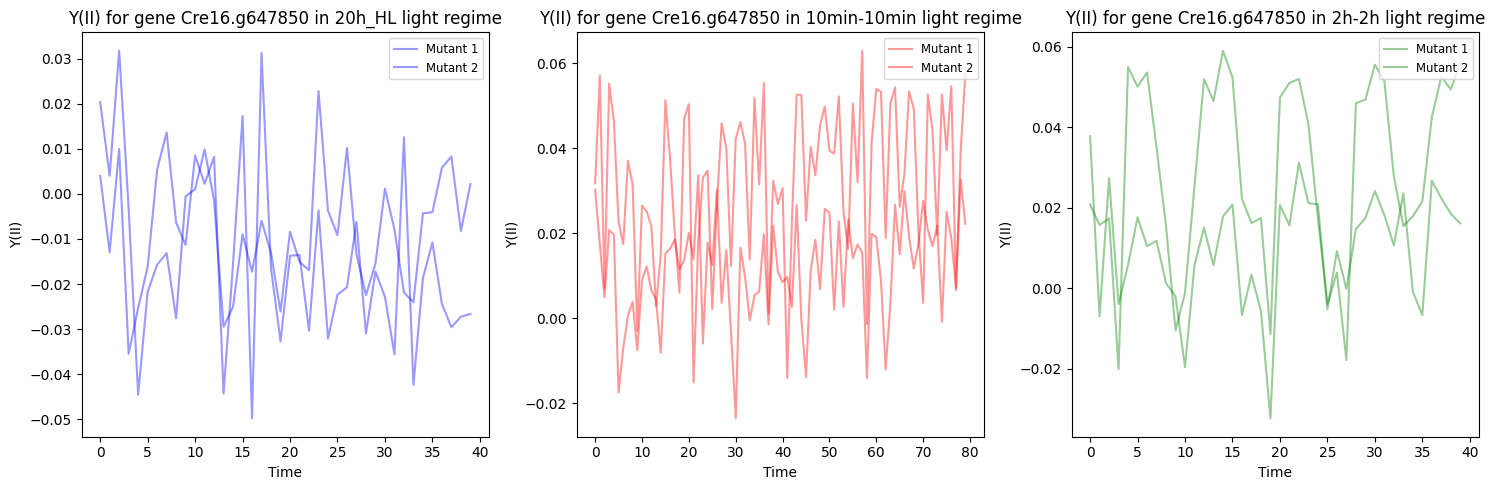

In [494]:
# Define the gene of interest and light regimes
gene_of_interest = 'Cre16.g647850'
light_regimes = ['20h_HL', '10min-10min', '2h-2h']
colors = ['b', 'r', 'g']
titles = ['Y(II) for gene {} in 20h_HL light regime'.format(gene_of_interest),
          'Y(II) for gene {} in 10min-10min light regime'.format(gene_of_interest),
          'Y(II) for gene {} in 2h-2h light regime'.format(gene_of_interest)]

# Prepare subplot layout
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over light regimes and plot Y(II) values
for i, (light_regime, color, title) in enumerate(zip(light_regimes, colors, titles)):
    # Filter data for the current gene and light regime
    filtered_data = final_list_y2_specific[(final_list_y2_specific['mutated_genes'] == gene_of_interest) & 
                                           (final_list_y2_specific['light_regime'] == light_regime)]
    
    # Extract Y(II) values and plot each line
    y2_values = filtered_data.filter(regex=r'^y2_\d+$').dropna(axis=1).values
    for j in range(y2_values.shape[0]):
        axes[i].plot(y2_values[j], c=color, alpha=0.4, label='Mutant {}'.format(j+1))
    
    # Set title and other plot properties
    axes[i].set_title(title)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Y(II)')
    axes[i].legend(loc='upper right', fontsize='small')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [556]:
data[(data['mutated_genes'] == 'Cre16.g661200')]

plate measurement start_date light_regime  dark_threshold  light_threshold  num_frames   i  j     fv_fm  mask_area      y2_1      y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8      y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15     y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22     y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29     y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36     y2_37     y2_38     y2_39     y2_40     y2_41     y2_42     y2_43     y2_44     y2_45     y2_46     y2_47     y2_48     y2_49     y2_50     y2_51     y2_52     y2_53     y2_54     y2_55     y2_56     y2_57     y2_58     y2_59     y2_60     y2_61     y2_62     y2_63     y2_64     y2_65     y2_66     y2_67     y2_68     y2_69     y2_70     y2_71     y2_72     y2_73     y2_74     y2_75     y2_76     y2_77     y2_78     y2_79     y2_80    ynpq_1    ynpq_2    ynpq_3    ynpq_4    ynpq_5    ynpq_6    ynpq_7  \
43351      1          M1 2024-03-31    1min-1min       16.270821        29.216220         164  14  7  0.665571         45  0.223771  0.500155  0.220667  0.500664  0.229704  0.503076  0.194695  0.490354  0.228902  0.503592  0.203234  0.491666  0.205421  0.496361  0.231367  0.500336  0.204741  0.520636  0.212908  0.496501  0.202237  0.479688  0.202620  0.500016  0.202859  0.517781  0.208489  0.506332  0.207454  0.499886  0.199202  0.509164  0.235359  0.517596  0.172182  0.523249  0.199645  0.514192  0.207632  0.486156  0.190734  0.494598  0.220232  0.498401  0.213871  0.511675  0.188481  0.497682  0.203128  0.507248  0.204753  0.505852  0.227490  0.510211  0.187445  0.521695  0.210468  0.504163  0.222579  0.498014  0.188915  0.510749  0.207573  0.496589  0.210089  0.495215  0.196962  0.488803  0.235264  0.501911  0.222289  0.500382  0.226482  0.465864  0.205993  0.508463  0.186681  0.481544  0.194566  0.493444  0.281979  0.131818  0.297509  0.139020  0.292826  0.143632  0.315259   
43735      1          M2 2024-04-01       20h_HL       15.926933        26.114041          84  14  7  0.663793         43  0.224610  0.258778  0.235780  0.226171  0.253208  0.238713  0.205793  0.249608  0.206923  0.218559  0.213119  0.213051  0.209722  0.214085  0.211933  0.192512  0.205858  0.218226  0.227965  0.220667  0.185320  0.212202  0.179519  0.193073  0.183079  0.184018  0.206283  0.182181  0.166068  0.177675  0.182192  0.201049  0.165096  0.187851  0.192038  0.170275  0.163664  0.151003  0.153531  0.142011       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.336344  0.334170  0.366902  0.385063  0.370273  0.378966  0.408438   
44119      1          M4 2024-04-03       20h_ML       15.275538        27.324924          84  14  7  0.654826         43  0.410832  0.439535  0.449300  0.426905  0.458145  0.433820  0.432253  0.416439  0.437550  0.429527  0.419966  0.420452  0.433094  0.409400  0.423046  0.413824  0.419177  0.424325  0.412108  0.399051  0.408854  0.414366  0.416640  0.411488  0.412645  0.397965  0.388443  0.416645  0.404839  0.404811  0.398919  0.413962  0.407633  0.409669  0.402966  0.407308  0.384022  0.386996  0.403151  0.403876       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.226513  0.219955  0.212458  0.234789  0.206776  0.232422  0.231952   
44503      1          M4 20

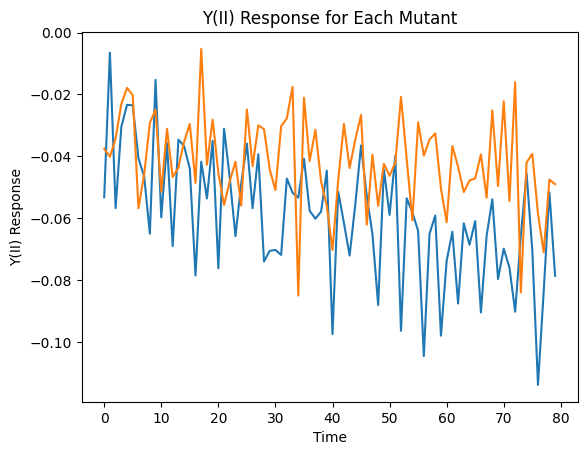

In [576]:
Data_analysis_func.plot_y2(data_norm_flagged[(data_norm_flagged['mutated_genes'] == 'Cre16.g661200') & (data_norm_flagged['light_regime'] == '1min-1min')])

In [569]:
data_smoothed[(data_smoothed['mutated_genes'] == 'Cre16.g661200') & (data_smoothed['light_regime'] == '20h_HL')]

plate measurement start_date light_regime  dark_threshold  light_threshold  num_frames   i  j     fv_fm  mask_area      y2_1      y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8      y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15     y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22     y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29     y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36     y2_37     y2_38     y2_39     y2_40  y2_41  y2_42  y2_43  y2_44  y2_45  y2_46  y2_47  y2_48  y2_49  y2_50  y2_51  y2_52  y2_53  y2_54  y2_55  y2_56  y2_57  y2_58  y2_59  y2_60  y2_61  y2_62  y2_63  y2_64  y2_65  y2_66  y2_67  y2_68  y2_69  y2_70  y2_71  y2_72  y2_73  y2_74  y2_75  y2_76  y2_77  y2_78  y2_79  y2_80    ynpq_1    ynpq_2    ynpq_3    ynpq_4    ynpq_5    ynpq_6    ynpq_7    ynpq_8    ynpq_9   ynpq_10   ynpq_11   ynpq_12   ynpq_13   ynpq_14   ynpq_15   ynpq_16   ynpq_17   ynpq_18   ynpq_19  \
20996     12          M2 2024-01-26       20h_HL       18.778625        24.553102          84  11  8 -0.021502         38 -0.072292 -0.072279 -0.072253 -0.072215 -0.072169 -0.072114 -0.072056 -0.071996 -0.071940 -0.071892 -0.071855 -0.071835 -0.071838 -0.071867 -0.071927 -0.072022 -0.072155 -0.072328 -0.072544 -0.072800 -0.073097 -0.073432 -0.073802 -0.074201 -0.074625 -0.075067 -0.075520 -0.075976 -0.076429 -0.076872 -0.077296 -0.077697 -0.078068 -0.078403 -0.078698 -0.078950 -0.079155 -0.079310 -0.079415 -0.079468    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  0.091724  0.092792  0.088049  0.066120  0.066917  0.084261  0.098801  0.074983  0.084637  0.079462  0.112120  0.090088  0.086845  0.128786  0.072346  0.092313  0.100815  0.132755  0.107128   
45888      1          M2 2024-04-01       20h_HL       15.926933        26.114041          84  14  7  0.011987         43 -0.048031 -0.048061 -0.048123 -0.048217 -0.048346 -0.048511 -0.048715 -0.048963 -0.049259 -0.049606 -0.050011 -0.050477 -0.051011 -0.051617 -0.052300 -0.053063 -0.053909 -0.054842 -0.055860 -0.056964 -0.058149 -0.059413 -0.060748 -0.062145 -0.063595 -0.065084 -0.066599 -0.068122 -0.069637 -0.071124 -0.072563 -0.073935 -0.075218 -0.076394 -0.077441 -0.078344 -0.079087 -0.079656 -0.080040 -0.080235    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  0.049488  0.027674  0.050422  0.063044  0.042740  0.059669  0.077848  0.028795  0.069114  0.052118  0.053567  0.058556  0.057033  0.047116  0.049062  0.067870  0.042967  0.047283  0.029705   

        ynpq_20   ynpq_21   ynpq_22   ynpq_23   ynpq_24   ynpq_25   ynpq_26   ynpq_27   ynpq_28   ynpq_29   ynpq_30   ynpq_31   ynpq_32   ynpq_33   ynpq_34   ynpq_35   ynpq_36   ynpq_37   ynpq_38   ynpq_39   ynpq_40  ynpq_41  ynpq_42  ynpq_43  ynpq_44  ynpq_45  ynpq_46  ynpq_47  ynpq_48  ynpq_49  ynpq_50  ynpq_51  ynpq_52  ynpq_53  ynpq_54  ynpq_55  ynpq_56  ynpq_57  ynpq_58  ynpq_59  ynpq_60  ynpq_61  ynpq_62  ynpq_63  ynpq_64  ynpq_65  ynpq_66  ynpq_67  ynpq_68  ynpq_69  ynpq_70  ynpq_71  ynpq_72  ynpq_73  ynpq_74  ynpq_75  ynpq_76  ynpq_77  ynpq_78  ynpq_79  ynpq_80  measurement_time_0  measurement_time_1  measurement_time_2  measurement_time_3  measurement_time_4  measurement_time_5  measurement_time_6  measurement_time_7  measurement_time_8  measurement_time_9 measurement_time_10 measurement_time_11 measurement_time_12 measurement_time_13 measurement_time_14 measurement_time_15 measurement_time_16 measurement_time_17 measurement_time_18 measurement_time_19 measurement_time_20  \
20996  0.091223  0.129

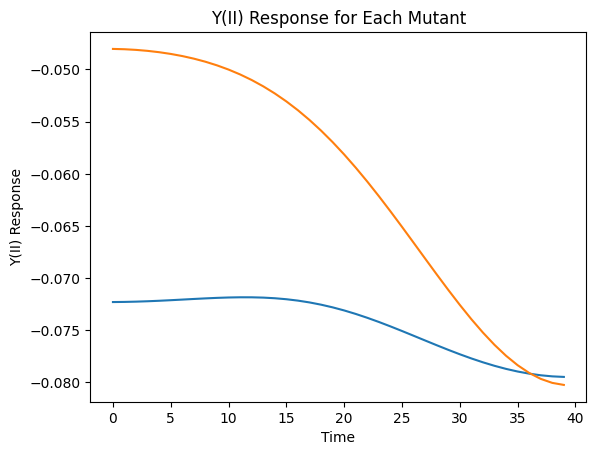

In [575]:
Data_analysis_func.plot_y2(data_smoothed[(data_smoothed['mutated_genes'] == 'Cre16.g661200') & (data_smoothed['light_regime'] == '20h_HL')])

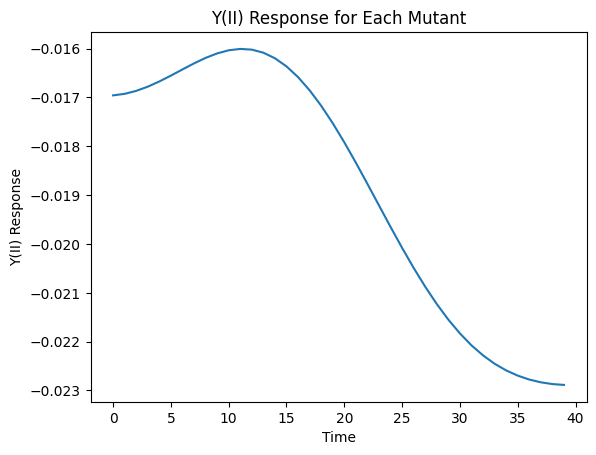

In [572]:
Data_analysis_func.plot_y2(data_smoothed[(data_smoothed['mutated_genes'] == 'Cre16.g661200') & (data_smoothed['light_regime'] == '2h-2h')])

In [ ]:
# Define the gene of interest and light regimes
gene_of_interest = final_mutants_end_down['mutated_genes'].unique()[0]

In [416]:
priority_mutants_y2_filtered_sorted.to_csv('priority_mutants_y2_light_specific.csv')

In [432]:
# make a df with priority_mutants_y2_filtered_sorted['mutated_genes'].unique() as values
gene_light_specific_y2 = pd.DataFrame({
    'outlier_type': ['light_specific_y2']*len(priority_mutants_y2_filtered_sorted['mutated_genes'].unique()),
    'gene_list': priority_mutants_2_filtered_sorted['mutated_genes'].unique() # List of selected genes for the second column
})

gene_light_specific_ynpq = pd.DataFrame({
    'outlier_type': ['light_specific_ynpq']*len(priority_mutants_ynpq_filtered_sorted['mutated_genes'].unique()),
    'gene_list': priority_mutants_ynpq_filtered_sorted['mutated_genes'].unique() # List of selected genes for the second column
})


In [ ]:
good_mutants_end_down_sorted.to_csv('mutants_end_down_y2_sorted.csv')
good_mutants_end_up_sorted.to_csv('mutants_end_up_y2_sorted.csv')
good_mutants_beg_up_sorted.to_csv('mutants_beg_up_y2_sorted.csv')
good_mutants_beg_down_sorted.to_csv('mutants_beg_down_y2_sorted.csv')

In [433]:
result_df.to_csv('genes_ynpq_light_specific.csv')

In [417]:
priority_mutants_ynpq_filtered_sorted.to_csv('priority_mutants_ynpq_light_specific.csv')

In [396]:
priority_mutants_ynpq_filtered_sorted = priority_mutants_ynpq_filtered.sort_values(by='mean_reduced_v2_ynpq')

In [379]:
data_norm_ok_y2[(data_norm_ok_y2['mutated_genes'] == 'Cre16.g675350') & (data_norm_ok_y2['light_regime'] == '20h_HL')]

plate measurement start_date light_regime  dark_threshold  \
40965     22          M2 2024-03-20       20h_HL       15.374445   
47629     20          M2 2024-04-07       20h_HL       15.205273   
47664     20          M2 2024-04-07       20h_HL       15.205273   
47757     20          M2 2024-04-07       20h_HL       15.205273   

       light_threshold  num_frames   i   j     fv_fm  mask_area      y2_1  \
40965        24.752659          84  14  11  0.000671         52  0.010960   
47629        25.159379          84   2  14  0.030549         36 -0.020757   
47664        25.159379          84   4   0 -0.051865         25 -0.057701   
47757        25.159379          84   7  22 -0.006379         48 -0.018689   

           y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8  \
40965 -0.004257 -0.024360 -0.034626 -0.018814 -0.031723 -0.002590 -0.018301   
47629 -0.021081 -0.075517  0.003423 -0.036332 -0.029214 -0.025849 -0.018585   
47664 -0.040329 -0.014101 -0.053597 -0.017125 -0.024267 -0.009803  0.002035   
47757 -0.070256 -0.066052 -0.035677 -0.086360 -0.069387 -0.012732 -0.056739   

           y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15  \
40965 -0.006725 -0.011235 -0.024342 -0.012727  0.020671 -0.011775  0.018145   
47629 -0.024729 -0.036729 -0.039006 -0.054403 -0.020329  0.000890 -0.034182   
47664  0.000159 -0.020175 -0.002884 -0.014824 -0.049611 -0.017444 -0.025593   
47757 -0.004186 -0.044782 -0.035326 -0.049276 -0.038879 -0.031031 -0.044433   

          y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22  \
40965 -0.033172 -0.009358  0.019734 -0.033659 -0.013975 -0.001846  0.001490   
47629  0.016147 -0.040266 -0.021274 -0.066536 -0.040295 -0.033266 -0.040046   
47664 -0.033412 -0.024615  0.009265 -0.021767 -0.039562 -0.055466  0.013349   
47757 -0.064230 -0.037027 -0.018607 -0.066604 -0.022580 -0.024778 -0.038531   

          y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29  \
40965 -0.002526 -0.024536 -0.011920 -0.039667 -0.008627 -0.007289 -0.015959   
47629 -0.031797 -0.001357 -0.009960 -0.024319 -0.058241 -0.030039 -0.038711   
47664 -0.004016 -0.019573 -0.011977 -0.018661 -0.047964 -0.025971 -0.024824   
47757 -0.030924 -0.029287 -0.044541 -0.008680 -0.038252 -0.036154 -0.021803   

          y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36  \
40965 -0.019899 -0.041052 -0.016413  0.016805 -0.036055 -0.018768 -0.016474   
47629 -0.066394 -0.067309 -0.034511 -0.028540 -0.041900 -0.084628 -0.017009   
47664 -0.045003  0.014129 -0.032958 -0.014458  0.005441 -0.052853 -0.027966   
47757 -0.027056 -0.008578 -0.011553 -0.023608 -0.027899 -0.026047 -0.038675   

          y2_37     y2_38     y2_39     y2_40  y2_41  y2_42  y2_43  y2_44  \
40965 -0.018052 -0.009556 -0.055301 -0.031182    NaN    NaN    NaN    NaN   
47629 -0.025305 -0.067521 -0.049095 -0.040870    NaN    NaN    NaN    NaN   
47664  0.004331 -0.054404 -0.064991 -0.046913    NaN    NaN    NaN    NaN   
47757 -0.026102 -0.040023 -0.025859 -0.055565    NaN    NaN    NaN    NaN   

       y2_45  y2_46  y2_47  y2_48  y2_49  y2_50  y2_51  y2_52  y2_53  y2_54  \
40965    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47629    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47664    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47757    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       y2_55  y2_56  y2_57  y2_58  y2_59  y2_60  y2_61  y2_62  y2_63  y2_64  \
40965    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47629    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47664    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47757    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       y2_65  y2_66  y2_67  y2_68  y2_69  y2_70  y2_71  y2_72  y2_73  y2_74  \
40965    NaN    NaN    NaN    NaN    NaN   

In [380]:
priority_mutants_y2_filtered_sorted[(priority_mutants_y2_filtered_sorted['mutated_genes'] == 'Cre16.g675350') & (priority_mutants_y2_filtered_sorted['light_regime'] == '20h_HL')]

plate measurement start_date light_regime  dark_threshold  \
40965     22          M2 2024-03-20       20h_HL       15.374445   
47664     20          M2 2024-04-07       20h_HL       15.205273   
47629     20          M2 2024-04-07       20h_HL       15.205273   
47757     20          M2 2024-04-07       20h_HL       15.205273   

       light_threshold  num_frames   i   j     fv_fm  mask_area      y2_1  \
40965        24.752659          84  14  11  0.000671         52  0.010960   
47664        25.159379          84   4   0 -0.051865         25 -0.057701   
47629        25.159379          84   2  14  0.030549         36 -0.020757   
47757        25.159379          84   7  22 -0.006379         48 -0.018689   

           y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8  \
40965 -0.004257 -0.024360 -0.034626 -0.018814 -0.031723 -0.002590 -0.018301   
47664 -0.040329 -0.014101 -0.053597 -0.017125 -0.024267 -0.009803  0.002035   
47629 -0.021081 -0.075517  0.003423 -0.036332 -0.029214 -0.025849 -0.018585   
47757 -0.070256 -0.066052 -0.035677 -0.086360 -0.069387 -0.012732 -0.056739   

           y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15  \
40965 -0.006725 -0.011235 -0.024342 -0.012727  0.020671 -0.011775  0.018145   
47664  0.000159 -0.020175 -0.002884 -0.014824 -0.049611 -0.017444 -0.025593   
47629 -0.024729 -0.036729 -0.039006 -0.054403 -0.020329  0.000890 -0.034182   
47757 -0.004186 -0.044782 -0.035326 -0.049276 -0.038879 -0.031031 -0.044433   

          y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22  \
40965 -0.033172 -0.009358  0.019734 -0.033659 -0.013975 -0.001846  0.001490   
47664 -0.033412 -0.024615  0.009265 -0.021767 -0.039562 -0.055466  0.013349   
47629  0.016147 -0.040266 -0.021274 -0.066536 -0.040295 -0.033266 -0.040046   
47757 -0.064230 -0.037027 -0.018607 -0.066604 -0.022580 -0.024778 -0.038531   

          y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29  \
40965 -0.002526 -0.024536 -0.011920 -0.039667 -0.008627 -0.007289 -0.015959   
47664 -0.004016 -0.019573 -0.011977 -0.018661 -0.047964 -0.025971 -0.024824   
47629 -0.031797 -0.001357 -0.009960 -0.024319 -0.058241 -0.030039 -0.038711   
47757 -0.030924 -0.029287 -0.044541 -0.008680 -0.038252 -0.036154 -0.021803   

          y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36  \
40965 -0.019899 -0.041052 -0.016413  0.016805 -0.036055 -0.018768 -0.016474   
47664 -0.045003  0.014129 -0.032958 -0.014458  0.005441 -0.052853 -0.027966   
47629 -0.066394 -0.067309 -0.034511 -0.028540 -0.041900 -0.084628 -0.017009   
47757 -0.027056 -0.008578 -0.011553 -0.023608 -0.027899 -0.026047 -0.038675   

          y2_37     y2_38     y2_39     y2_40  y2_41  y2_42  y2_43  y2_44  \
40965 -0.018052 -0.009556 -0.055301 -0.031182    NaN    NaN    NaN    NaN   
47664  0.004331 -0.054404 -0.064991 -0.046913    NaN    NaN    NaN    NaN   
47629 -0.025305 -0.067521 -0.049095 -0.040870    NaN    NaN    NaN    NaN   
47757 -0.026102 -0.040023 -0.025859 -0.055565    NaN    NaN    NaN    NaN   

       y2_45  y2_46  y2_47  y2_48  y2_49  y2_50  y2_51  y2_52  y2_53  y2_54  \
40965    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47664    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47629    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47757    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       y2_55  y2_56  y2_57  y2_58  y2_59  y2_60  y2_61  y2_62  y2_63  y2_64  \
40965    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47664    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47629    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
47757    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       y2_65  y2_66  y2_67  y2_68  y2_69  y2_70  y2_71  y2_72  y2_73  y2_74  \
40965    NaN    NaN    NaN    NaN    NaN   

In [362]:
priority_mutants_y2_filtered_sorted[priority_mutants_y2_filtered_sorted['mutant_ID'] == priority_mutants_y2_filtered_sorted['mutant_ID'].unique()[0]]

plate measurement start_date light_regime  dark_threshold  \
48398     20          M4 2024-04-09        2h-2h       14.997568   
47241     20          M1 2024-04-06    1min-1min       13.787884   
48774     20          M5 2024-04-10  10min-10min       14.437037   
48017     20          M3 2024-04-08       20h_ML       14.888457   
47629     20          M2 2024-04-07       20h_HL       15.205273   

       light_threshold  num_frames  i   j     fv_fm  mask_area      y2_1  \
48398        28.973246          84  2  14  0.024399         40 -0.026217   
47241        25.690321         164  2  14  0.012059         33 -0.037184   
48774        27.642740         164  2  14  0.029814         42  0.022436   
48017        26.038084          84  2  14  0.011652         49 -0.020794   
47629        25.159379          84  2  14  0.030549         36 -0.020757   

           y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8  \
48398 -0.005248 -0.037408 -0.021418  0.015092  0.032617  0.026346  0.025151   
47241  0.005437 -0.004546  0.008107 -0.003305  0.024270  0.007657  0.002250   
48774 -0.021874 -0.021580  0.018559  0.020087 -0.004243 -0.008326  0.023409   
48017 -0.024314  0.002712  0.006892 -0.027081 -0.018806 -0.021283 -0.022289   
47629 -0.021081 -0.075517  0.003423 -0.036332 -0.029214 -0.025849 -0.018585   

           y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15  \
48398 -0.016896 -0.053469 -0.036230 -0.046941  0.014750  0.033112  0.037588   
47241 -0.008119  0.007459 -0.015628  0.008844 -0.024669  0.022333 -0.028909   
48774  0.020384 -0.012091 -0.019119  0.028349  0.023922 -0.005465 -0.025058   
48017 -0.004618 -0.007775 -0.013028 -0.045399 -0.012373 -0.007266  0.000553   
47629 -0.024729 -0.036729 -0.039006 -0.054403 -0.020329  0.000890 -0.034182   

          y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22  \
48398  0.029053 -0.025390 -0.035388 -0.025667 -0.025932  0.027981  0.029280   
47241  0.003685 -0.000133  0.011862  0.017766  0.012881 -0.028429  0.031954   
48774  0.015728  0.025323 -0.006627  0.002632  0.035022  0.021856 -0.044572   
48017  0.002760 -0.008991 -0.025552 -0.018686 -0.016083 -0.041757  0.003263   
47629  0.016147 -0.040266 -0.021274 -0.066536 -0.040295 -0.033266 -0.040046   

          y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29  \
48398  0.032313  0.027033 -0.015588 -0.034687 -0.046023 -0.049450  0.024801   
47241 -0.033941  0.030177 -0.003683  0.008116 -0.030993  0.012510 -0.005739   
48774  0.007348  0.035855  0.019961 -0.004245 -0.030404  0.038094  0.035084   
48017 -0.016308 -0.008514 -0.032162 -0.038753 -0.014442  0.002427 -0.015583   
47629 -0.031797 -0.001357 -0.009960 -0.024319 -0.058241 -0.030039 -0.038711   

          y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36  \
48398  0.027049  0.022976  0.028461 -0.047480 -0.047848 -0.038536 -0.071661   
47241  0.018733  0.000741  0.012319  0.008435  0.010641 -0.004019  0.012306   
48774 -0.005111 -0.008355  0.025023  0.039235  0.021844 -0.017815  0.035718   
48017 -0.016993 -0.016890 -0.012680 -0.008753 -0.021842 -0.014319 -0.016354   
47629 -0.066394 -0.067309 -0.034511 -0.028540 -0.041900 -0.084628 -0.017009   

          y2_37     y2_38     y2_39     y2_40     y2_41     y2_42     y2_43  \
48398  0.026717  0.017673  0.016315  0.034125       NaN       NaN       NaN   
47241 -0.020594 -0.000437 -0.006087  0.005300 -0.011096  0.004228 -0.017439   
48774  0.030825 -0.019201 -0.003902  0.029374  0.025374 -0.001746 -0.044586   
48017  0.000749 -0.026001 -0.018003 -0.005439       NaN       NaN       NaN   
47629 -0.025305 -0.067521 -0.049095 -0.040870       NaN       NaN       NaN   

          y2_44     y2_45     y2_46     y2_47     y2_48     y2_49     y2_50  \
48398       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
47241  0.008045 -0.009347  0.028148 -0.008562  0.004548  0.007189  0.023115   
48774  0.026509  0.016894  0.003840 -0.017108  0.03778

/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_70963/3524253364.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_analysis_func.plot_y2(priority_mutants_y2_filtered_sorted[(priority_mutants_y2_filtered_sorted['mutant_ID'] == priority_mutants_y2_filtered_sorted['mutant_ID'].unique()[0]) & (priority_mutants_y2_filtered['light_regime'] == light)])


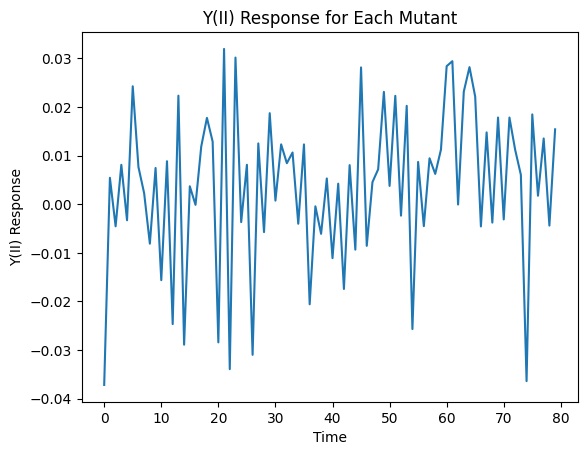

In [364]:
light = '1min-1min'
Data_analysis_func.plot_y2(priority_mutants_y2_filtered_sorted[(priority_mutants_y2_filtered_sorted['mutant_ID'] == priority_mutants_y2_filtered_sorted['mutant_ID'].unique()[0]) & (priority_mutants_y2_filtered['light_regime'] == light)])

## Trend detection

In [109]:
time_series_data = data_norm_flagged[(data_norm_flagged['light_regime'] == '20h_HL') & (data_norm_flagged['outlier_divergent_end_down_y2'] == True)].filter(like='y2_').dropna(axis=1).values

In [1]:
data_norm_flagged[(data_norm_flagged['light_regime'] == '20h_HL')]

NameError: name 'data_norm_flagged' is not defined

In [198]:
pd.set_option('Display.max_columns', None)

In [645]:
data_norm_flagged[(data_norm_flagged['light_regime'] == '1min-1min') & (data_norm_flagged['outlier_divergent_end_down_y2'] == True)]

plate measurement start_date light_regime  dark_threshold  light_threshold  num_frames   i   j     fv_fm  mask_area      y2_1      y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8      y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15     y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22     y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29     y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36     y2_37     y2_38     y2_39     y2_40     y2_41     y2_42     y2_43     y2_44     y2_45     y2_46     y2_47     y2_48     y2_49     y2_50     y2_51     y2_52     y2_53     y2_54     y2_55     y2_56     y2_57     y2_58     y2_59     y2_60     y2_61     y2_62     y2_63     y2_64     y2_65     y2_66     y2_67     y2_68     y2_69     y2_70     y2_71     y2_72     y2_73     y2_74     y2_75     y2_76     y2_77     y2_78     y2_79     y2_80    ynpq_1    ynpq_2    ynpq_3    ynpq_4    ynpq_5    ynpq_6    ynpq_7  \
775        2          M1 2023-10-18    1min-1min       17.221402        25.338585         164   0   8 -0.019678         25 -0.027663 -0.021263 -0.045159 -0.028273 -0.017499 -0.040659 -0.037399  0.020111 -0.009976 -0.025555 -0.076721 -0.039582 -0.012899 -0.041283 -0.042789 -0.005273 -0.032288 -0.028265 -0.036912 -0.061165 -0.022061 -0.075950 -0.060299 -0.016743 -0.005930 -0.040264 -0.020566 -0.056996 -0.026988 -0.030687 -0.001586 -0.063580  0.002453 -0.046280 -0.047719 -0.026735 -0.085509 -0.105553 -0.080038 -0.066795  0.004430 -0.061699 -0.062581 -0.085082 -0.050096 -0.083632 -0.048646 -0.037319 -0.011746 -0.062517 -0.090445 -0.041699 -0.070761 -0.061530 -0.045564 -0.014628 -0.003523 -0.066150 -0.081387 -0.088564 -0.021150 -0.047466 -0.025804 -0.015149 -0.035777 -0.022549 -0.042155 -0.061250 -0.064125 -0.028388 -0.011706 -0.025000 -0.064313 -0.029181 -0.061052 -0.061541 -0.050482 -0.052446 -0.058904 -0.064661  0.006321 -0.006990  0.014986  0.002115  0.011647  0.017739  0.022733   
793        2          M1 2023-10-18    1min-1min       17.221402        25.338585         164   1   1 -0.047998         17 -0.098808 -0.030598 -0.032970 -0.039971  0.034195 -0.016049 -0.015524 -0.011159 -0.038791 -0.005210 -0.046278 -0.048352 -0.012163 -0.034492 -0.070737 -0.014575 -0.005803 -0.048941 -0.081884 -0.059669  0.017983 -0.038269  0.013551 -0.063527  0.028266 -0.035227 -0.029158 -0.035946 -0.018058 -0.022639 -0.040867 -0.083325 -0.017575 -0.032376 -0.044071 -0.064656 -0.049242 -0.088979 -0.005192 -0.051020  0.006334 -0.003520 -0.058184 -0.085123 -0.064353 -0.030105 -0.066349 -0.023961 -0.020238 -0.075042 -0.061247 -0.027267 -0.079988 -0.071479  0.004766 -0.018992 -0.049573 -0.048641 -0.008480 -0.063365 -0.088761 -0.059372 -0.028842 -0.064074 -0.032090 -0.037738 -0.073561 -0.047205 -0.014781 -0.078886 -0.069570 -0.010271 -0.080111 -0.039264 -0.058265 -0.075006 -0.055884 -0.019598 -0.016020 -0.054328  0.058605  0.004964  0.015275  0.014992 -0.029230  0.005156  0.010650   
802        2          M1 2023-10-18    1min-1min       17.221402        25.338585         164   1  10 -0.066678         31 -0.056091 -0.047874 -0.035479 -0.013258 -0.033037 -0.085113 -0.041245 -0.028815 -0.021523 -0.059418 -0.053699 -0.063579 -0.001320 -0.067742 -0.062734 -0.035682 -0.028579 -0.065289 -0.048390 -0.047151 -0.027751 -0.061910 -0.043916 -0.048264 -0.034724 -0.047784  0.001464 -0.050220 -0.067527 -0.031783 -0.035679 -0.071219 -0.031180 -0.091356 -0.077393 -0.082487 -0.032567 -0.060250 -0.012862 -0.095208 -0.024239 -0.023378 -0.024181 -0.095834 -0.063730 -0.058503 -0.061197 -0.056388 -0.085082 -0.066099 -0.082765 -0.059413 -0.053708 -0.101340 -0.032553 -0.050140 -0.026331 -0.057267 -0.049616 -0.072149 -0.051927 -0.065562 -0.040801 -0.064958 -0.038318 -0.053424 -0.080833 -0.087762 -0.026490 -0.067840 -0.044394 -0.079636 -0.029908 -0.044537 -0.077131 -0.082518 -0.086694 -0.035027 -0.074898 -0.074826 -0.011657 -0.025399 -0.036866 -0.023549 -0.021791  0.014316 -0.002342   
808        2          M

In [110]:
time_series_noisy = time_series_data[7]

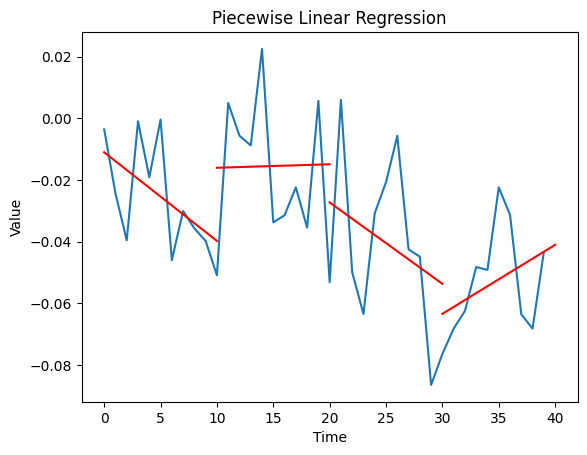

In [111]:
Feature_engineering.plot_segments(time_series_noisy, segment_length=10)

In [648]:
pip install localreg

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
  Created wheel for localreg: filename=localreg-0.5.0-py3-none-any.whl size=30917 sha256=fb9c229ac072b1f368ac72cc61ca83c5a47650cc55056a195d278671f1097eda
  Stored in directory: /Users/samsongourevitch/Library/Caches/pip/wheels/bf/a2/c9/fd7f82841ec6130214d521a55a34b14e30e2c87fc7960bb849
Successfully built localreg
Note: you may need to restart the kernel to use updated packages.


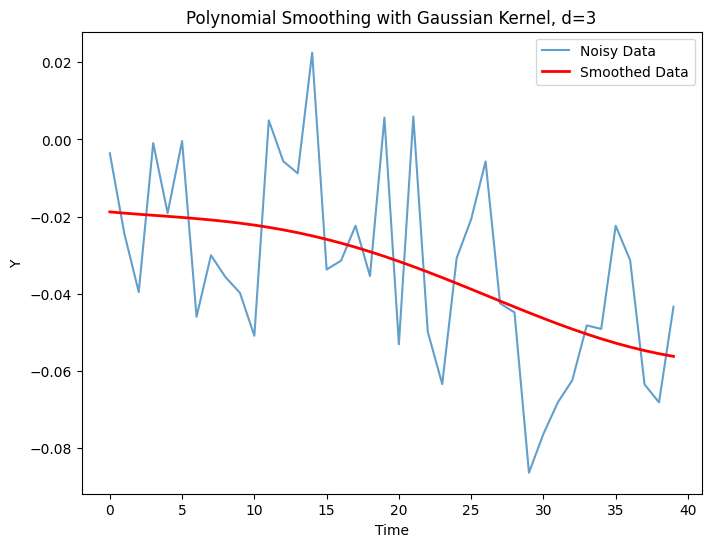

In [696]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
from localreg import *

def kernel_smooth(data, sigma=1.0):
    smoothed_data = gaussian_filter1d(data, sigma)
    return smoothed_data

# Example usage:
# Generate noisy data
np.random.seed(0)
# data_norm_features.sort_values('div_y2', ascending=True).iloc[:10]
x = np.arange(len(time_series_noisy))
y_noisy = time_series_noisy
y_noisy_WT = data_norm_flagged[(data_norm_flagged['mutant_ID'] == 'WT') & (data_norm_flagged['light_regime'] == '20h_HL')].filter(like='y2_').iloc[:1].dropna(axis=1).values[0]

# Smooth the noisy data using Gaussian kernel
# y_smoothed = kernel_smooth(time_series_noisy, sigma=10)

# Smooth the noisy data using polynomial fit 
# y_smoothed = np.poly1d(np.polyfit(x), y_noisy, 3))(np.arange(len(y_noisy)))

y_smoothed = localreg(x, y_noisy, degree=1, kernel=rbf.gaussian, radius=10)

plt.figure(figsize=(8, 6))
# plt.plot(y_noisy_WT, label='Noisy Data', alpha=0.7)
# plt.plot(y_smoothed, label='Smoothed Data', color='red', linewidth=2)
plt.plot(y_noisy, label='Noisy Data', alpha=0.7)
plt.plot(y_smoothed, label='Smoothed Data', color='red', linewidth=2)
plt.legend()
plt.title('Polynomial Smoothing with Gaussian Kernel, d=3')
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()


In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

X = np.arange(len(time_series_noisy))
y = time_series_noisy

# Define a range of polynomial degrees and bandwidths to evaluate
degrees = [1, 2, 3]  # Polynomial degrees (1=linear, 2=quadratic, 3=cubic)
radius = [0.5, 1, 5, 8, 10, 12, 15, 20, 100]  # Bandwidth values

# Prepare for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation and evaluate different models
results = {}

for degree in degrees:
    for rad in radius:
        mse_scores = []
        
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            y_smoothed = localreg(X_train, y_train, degree=degree, kernel=rbf.gaussian, radius=rad)
            y_pred = np.interp(X_val, X_train, y_smoothed)  # Interpolate for validation set
            
            # Compute MSE
            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)
        
        # Calculate average MSE across folds
        avg_mse = np.mean(mse_scores)
        results[(degree, rad)] = avg_mse

# Print results
print("Cross-validation results:")
for params, avg_mse in results.items():
    degree, rad = params
    # print(f"Degree={degree}, Radius={rad:.2f}, Avg. MSE={avg_mse:.4f}")

# Plot bias-variance tradeoff (average MSE vs. model complexity)
avg_mse_values = np.array(list(results.values()))
avg_mse_values = avg_mse_values.reshape(len(degrees), len(radius))

plt.figure(figsize=(8, 6))
for i, degree in enumerate(degrees):
    plt.plot(radius, avg_mse_values[i, :], label=f'Degree={degree}')
plt.title('Bias-Variance Tradeoff for Local Polynomial Regression')
plt.xlabel('Bandwidth')
plt.ylabel('Average MSE')
plt.xticks(radius)
plt.legend()
plt.show()


NameError: name 'np' is not defined

Cross-validation results:


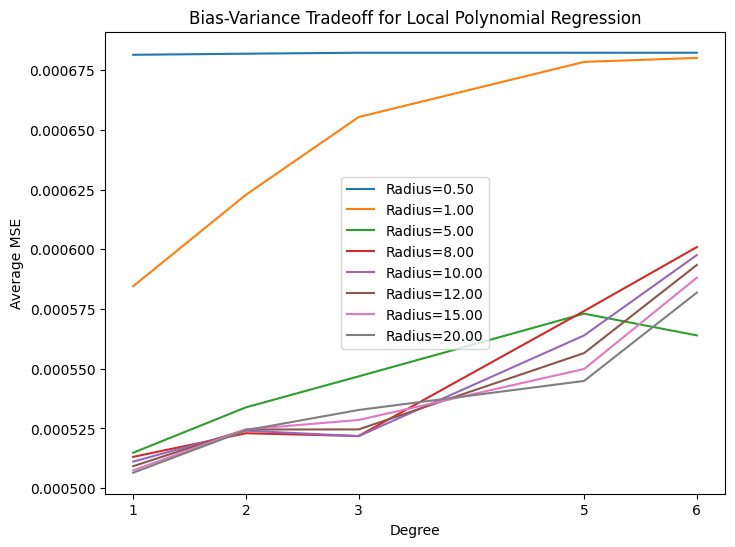

In [685]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming 'localreg' and 'rbf' are defined elsewhere in the code

# Generate synthetic data (example using placeholder 'y_noisy')
X = np.arange(len(time_series_noisy))
y = time_series_noisy

# Define a range of bandwidths (previously 'radius') and polynomial degrees
radius = [0.5, 1, 5, 8, 10, 12, 15, 20]  # Bandwidth values
degrees = [1, 2, 3, 5, 6]  # Polynomial degrees (1=linear, 2=quadratic, 3=cubic)

# Prepare for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation and evaluate different models
results = {}

for rad in radius:
    for degree in degrees:
        mse_scores = []
        
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            # Assuming 'localreg' and 'rbf' functions are used for local polynomial regression
            y_smoothed = localreg(X_train, y_train, degree=degree, kernel=rbf.gaussian, radius=rad)
            y_pred = np.interp(X_val, X_train, y_smoothed)  # Interpolate for validation set
            
            # Compute MSE
            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)
        
        # Calculate average MSE across folds
        avg_mse = np.mean(mse_scores)
        results[(rad, degree)] = avg_mse

# Print results
print("Cross-validation results:")
for params, avg_mse in results.items():
    rad, degree = params
    # print(f"Radius={rad:.2f}, Degree={degree}, Avg. MSE={avg_mse:.4f}")

# Plot bias-variance tradeoff (average MSE vs. model complexity)
avg_mse_values = np.array(list(results.values()))
avg_mse_values = avg_mse_values.reshape(len(radius), len(degrees))

plt.figure(figsize=(8, 6))
for i, rad in enumerate(radius):
    plt.plot(degrees, avg_mse_values[i, :], label=f'Radius={rad:.2f}')
plt.title('Bias-Variance Tradeoff for Local Polynomial Regression')
plt.xlabel('Degree')
plt.ylabel('Average MSE')
plt.xticks(degrees)
plt.legend()
plt.show()


Optimal Degree: 1, Optimal Radius: 100
Min Average MSE: 0.0008


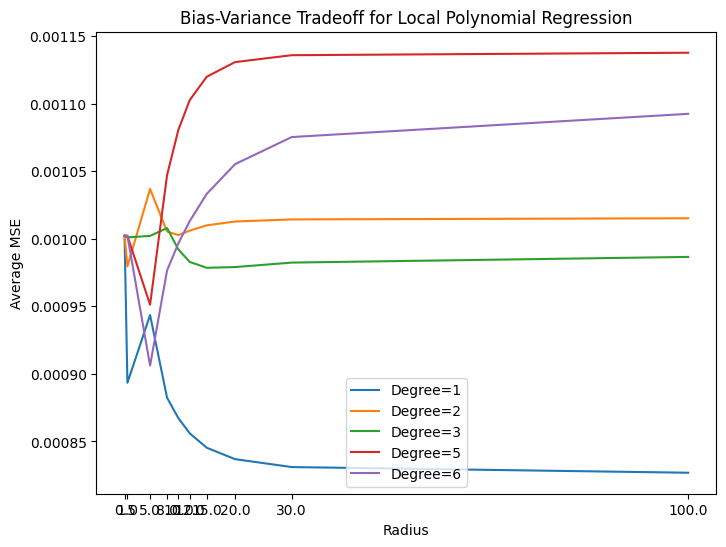

In [691]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Assuming X and y represent your time series data
X = np.arange(len(time_series_noisy))
y = time_series_noisy

# Define the range of polynomial degrees and bandwidths to evaluate
radii = [0.5, 1, 5, 8, 10, 12, 15, 20, 30, 100]  # Bandwidth values
degrees = [1, 2, 3, 5, 6]  # Bandwidth (radius) values

# Initialize cross-validation
n_splits = 5  # Number of splits for time series cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Dictionary to store results
results = {}

# Perform cross-validation and evaluate different models
for degree in degrees:
    for radius in radii:
        mse_scores = []
        
        for train_index, val_index in tscv.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            # Fit local polynomial regression (lowess) on the training data
            y_smoothed = localreg(X_train, y_train, degree=degree, kernel=rbf.gaussian, radius=radius)
            
            # Interpolate to predict values for validation set
            y_pred = np.interp(X_val, X_train, y_smoothed)
            
            # Calculate MSE for the fold
            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)
        
        # Calculate average MSE across folds for the current parameter combination
        avg_mse = np.mean(mse_scores)
        results[(degree, radius)] = avg_mse

# Find the optimal parameters (degree, radius) that minimize MSE
optimal_params = min(results, key=results.get)
optimal_degree, optimal_radius = optimal_params
min_avg_mse = results[optimal_params]

# Print results
print(f"Optimal Degree: {optimal_degree}, Optimal Radius: {optimal_radius}")
print(f"Min Average MSE: {min_avg_mse:.4f}")

# Plot results or visualize the bias-variance tradeoff
# (e.g., plot MSE vs. degree or radius)

# Plot bias-variance tradeoff (average MSE vs. model complexity)
avg_mse_values = np.array(list(results.values()))
avg_mse_values = avg_mse_values.reshape(len(degrees), len(radii))

plt.figure(figsize=(8, 6))
for i, degree in enumerate(degrees):
    plt.plot(radii, avg_mse_values[i, :], label=f'Degree={degree}')
plt.title('Bias-Variance Tradeoff for Local Polynomial Regression')
plt.xlabel('Radius')
plt.ylabel('Average MSE')
plt.xticks(radii)
plt.legend()
plt.show()


Text(0.5, 1.0, 'Derivative of the Smoothed Data')

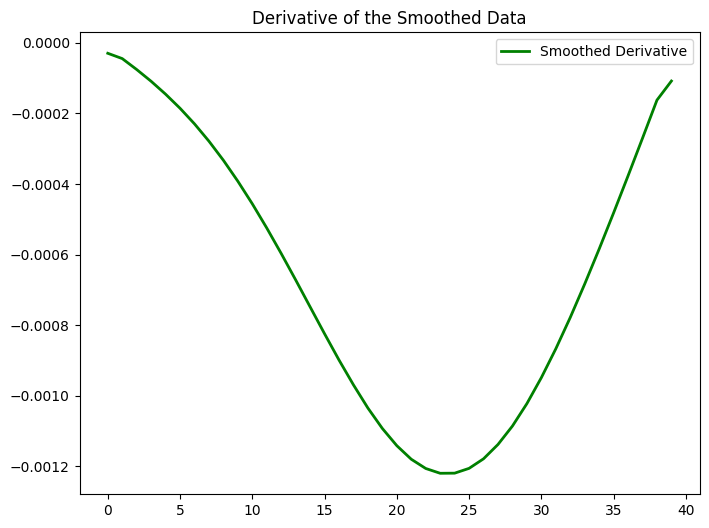

In [113]:
# compute the derivative of the smoothed function and plot it 
def kernel_smooth_derivative(data, sigma=1.0):
    smoothed_data = kernel_smooth(data, sigma)
    derivative = np.gradient(smoothed_data)
    return derivative

# Compute the derivative of the smoothed data

y_smoothed_derivative = kernel_smooth_derivative(time_series_noisy, sigma=10.0)

plt.figure(figsize=(8, 6))
plt.plot(y_smoothed_derivative, label='Smoothed Derivative', color='green', linewidth=2)
plt.legend()
plt.title('Derivative of the Smoothed Data')

In [599]:
data_norm_features = Feature_engineering.extract_features(data_norm_flagged)

100%|██████████| 53523/53523 [02:12<00:00, 405.21it/s]


In [601]:
data_norm_features[data_norm_features['light_regime'] == '20h_HL'].sort_values('abs_var_y2', ascending=False)

plate measurement start_date light_regime  dark_threshold  light_threshold  num_frames   i   j     fv_fm  mask_area      y2_1      y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8      y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15     y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22     y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29     y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36     y2_37     y2_38     y2_39     y2_40     y2_41     y2_42     y2_43     y2_44     y2_45     y2_46     y2_47     y2_48     y2_49     y2_50     y2_51     y2_52     y2_53     y2_54     y2_55     y2_56     y2_57     y2_58     y2_59     y2_60     y2_61     y2_62     y2_63     y2_64     y2_65     y2_66     y2_67     y2_68     y2_69     y2_70     y2_71     y2_72     y2_73     y2_74     y2_75     y2_76     y2_77     y2_78     y2_79     y2_80    ynpq_1    ynpq_2    ynpq_3    ynpq_4    ynpq_5    ynpq_6    ynpq_7  \
39835     21          M6 2024-03-18      30s-30s       15.068691        28.079667         164   2  15  0.048173         40 -0.050897  0.046899 -0.069009  0.029272 -0.072732  0.015208 -0.076456 -0.004382 -0.061982 -0.009341 -0.074794 -0.022374 -0.106584 -0.036095 -0.090965 -0.044091 -0.092020 -0.051748 -0.105869 -0.069845 -0.121933 -0.080008 -0.138135 -0.076840 -0.149568 -0.087469 -0.143870 -0.081282 -0.144349 -0.093608 -0.149653 -0.117244 -0.157697 -0.113090 -0.167111 -0.141686 -0.170907 -0.121975 -0.208080 -0.138803 -0.188261 -0.126849 -0.207881 -0.135151 -0.197386 -0.147046 -0.204228 -0.170500 -0.210670 -0.163068 -0.227844 -0.170775 -0.239971 -0.165043 -0.201447 -0.149221 -0.222263 -0.183129 -0.221669 -0.194530 -0.245428 -0.198518 -0.249413 -0.197169 -0.229041 -0.186004 -0.268004 -0.191631 -0.233888 -0.204762 -0.252084 -0.202161 -0.271873 -0.187330 -0.249368 -0.231831 -0.273815 -0.226918 -0.253086 -0.231916  0.099993  0.034859  0.105192  0.033962  0.110246  0.043748  0.099281   
9815       7          M1 2023-11-17    1min-1min       17.945651        26.886477         164  15  14 -0.085936          1 -0.169988 -0.127868  0.070949  0.002615 -0.198668 -0.085439  0.015847  0.024584 -0.380176  0.002087 -0.340023  0.116421 -0.262645 -0.010776 -0.066798  0.122902  0.184128 -0.125536  0.192872 -0.228372 -0.030272 -0.075508  0.126441  0.171544 -0.275439  0.035199  0.078034 -0.018071  0.038519 -0.063892 -0.055620  0.013714 -0.582769  0.058155 -0.000901  0.170145 -0.011392  0.178094 -0.414403 -0.189959 -0.130136 -0.037802  0.055536 -0.070331 -0.500394 -0.232362 -0.176092  0.079905 -0.599970 -0.079934 -0.175318 -0.007248 -0.027886 -0.216556  0.000401  0.077418 -0.143566 -0.205814 -0.186536  0.059774 -0.204696 -0.157326 -0.184391 -0.118246 -0.277994 -0.036760 -0.331566  0.027914 -0.233198  0.041770  0.092938  0.035315 -0.286110 -0.015692  0.120104 -0.276401 -0.364003 -0.287762 -0.298358 -0.068855 -0.003549 -0.003561 -0.225166 -0.067696 -0.052270  0.040104 -0.064517   
26499     14          M6 2024-02-11      30s-30s       18.938754        26.990230         164  15  19  0.011144          1  0.229450  0.132849 -0.030106  0.148197 -0.079441  0.075147  0.061410  0.106754 -0.016567  0.118012 -0.074371  0.111926  0.284447  0.078374  0.211851 -0.049954 -0.021318 -0.020756  0.327530 -0.023147 -0.109185  0.154049 -0.076892 -0.217814 -0.018178  0.099694  0.154451  0.027911  0.155895  0.232153 -0.013463 -0.168917  0.258906  0.151671 -0.050642 -0.060085  0.139035  0.086109  0.136539 -0.094724 -0.312881  0.045876  0.095013  0.076017  0.061620  0.085921 -0.030883 -0.211725  0.007573  0.038445 -0.270267  0.033282 -0.397143 -0.112249  0.007854 -0.045367  0.140248  0.057964  0.013972 -0.032919 -0.089955  0.100820  0.013083  0.097091  0.118882  0.033610  0.006848  0.121925  0.037829  0.085567 -0.054456  0.045038  0.138346  0.187988 -0.344108  0.141337 -0.322417  0.133965 -0.046768  0.089338 -0.144059 -0.003295  0.070321 -0.050261  0.034277 -0.037233 -0.052083   
38217     21          M

In [602]:
data_norm_features[(data_norm_features['outlier_divergent_end_down_y2'] == True) & (data_norm_features['outlier_divergent_beg_up_y2'] == True)]

plate measurement start_date light_regime  dark_threshold  light_threshold  num_frames   i   j     fv_fm  mask_area      y2_1      y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8      y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15     y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22     y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29     y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36     y2_37     y2_38     y2_39     y2_40     y2_41     y2_42     y2_43     y2_44     y2_45     y2_46     y2_47     y2_48     y2_49     y2_50     y2_51     y2_52     y2_53     y2_54     y2_55     y2_56     y2_57     y2_58     y2_59     y2_60     y2_61     y2_62     y2_63     y2_64     y2_65     y2_66     y2_67     y2_68     y2_69     y2_70     y2_71     y2_72     y2_73     y2_74     y2_75     y2_76     y2_77     y2_78     y2_79     y2_80    ynpq_1    ynpq_2    ynpq_3    ynpq_4    ynpq_5    ynpq_6    ynpq_7  \
1408       2          M3 2023-10-20       20h_HL       19.047878        24.634703          84   9   8  0.068751         39  0.075480  0.089019  0.038035  0.023986  0.051039  0.042886  0.050211  0.046226  0.011786  0.044171  0.043586  0.021124  0.026361 -0.031250 -0.015846 -0.011663  0.001852 -0.008503 -0.040816  0.021643 -0.040967 -0.020922 -0.040940 -0.017483  0.000854 -0.044300 -0.046591 -0.053154 -0.031226 -0.066145 -0.030120 -0.066835 -0.089465 -0.048962 -0.063145 -0.064257 -0.054531 -0.084797 -0.071691 -0.033447       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.081464  0.051290  0.094406  0.094098  0.078043  0.085732  0.074969   
6924       5          M2 2023-11-06       20h_HL       20.526840        25.949087          84  13   3  0.050067         38  0.091450  0.088211  0.077496  0.076022  0.084358  0.071762  0.023551  0.060092  0.027949  0.060016 -0.007332  0.004148 -0.006511  0.001270 -0.025051 -0.002510 -0.032378  0.007167  0.064187  0.005361  0.020697 -0.015212 -0.002506  0.019305 -0.031053 -0.004143 -0.026251 -0.033602 -0.022128  0.023454 -0.052586 -0.045801 -0.037004 -0.021124 -0.055719 -0.067090 -0.053592 -0.046803 -0.025873 -0.037188       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN -0.033299 -0.032649 -0.030699 -0.035046 -0.039415 -0.034609 -0.004225   
9764       7          M1 2023-11-17    1min-1min       17.945651        26.886477         164  13  17 -0.001015          1  0.070822 -0.004158  0.064327  0.102579  0.109489  0.096916 -0.419418  0.122212 -0.196130  0.086354 -0.055710  0.008184 -0.030901  0.113902  0.173745 -0.020494  0.104302  0.036850  0.123845 -0.102307 -0.439837  0.166029  0.009875  0.129195  0.114847  0.160599  0.231322  0.019776 -0.043070 -0.111241  0.190819 -0.059638 -0.085670  0.074491  0.285619  0.073430  0.187621 -0.167582  0.152585 -0.230629  0.027341 -0.056444 -0.050330  0.036805 -0.027743  0.093258 -0.095763  0.135129  0.081693 -0.005360  0.067117  0.054358  0.069311  0.031195  0.116426 -0.191783  0.161906  0.109033  0.076526 -0.030700 -0.016025  0.028058  0.075999  0.172961  0.070023  0.133238  0.188508  0.255539  0.036219  0.126518 -0.081743  0.160270 -0.202456 -0.066669  0.152882 -0.193977  0.167269 -0.038000 -0.169985  0.056955 -0.240584 -0.018398 -0.083821 -0.114339 -0.146504 -0.059565  0.300111   
9765       7          M

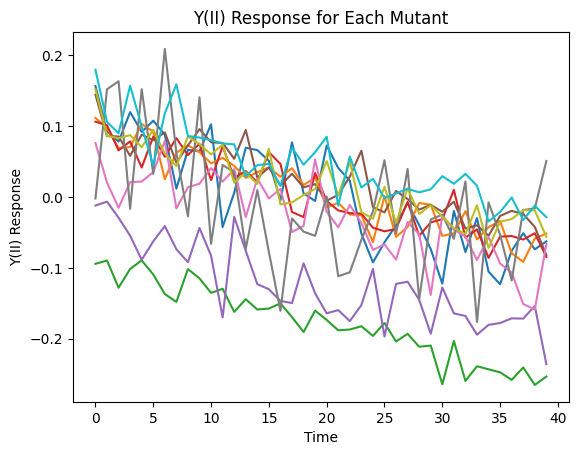

In [614]:
Data_analysis_func.plot_y2(data_norm_features[(data_norm_features['light_regime'] == '20h_HL')].sort_values('abs_var_y2', ascending=False).iloc[:10])

In [607]:
data_smoothed = Data_v2.get_smooth_data(data_norm_features)

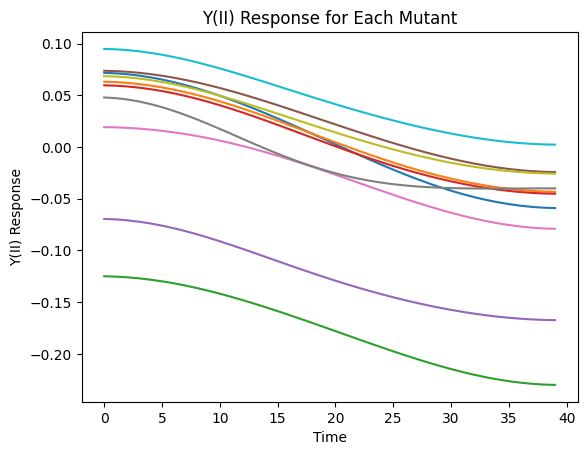

In [615]:
Data_analysis_func.plot_y2(data_smoothed[(data_smoothed['light_regime'] == '20h_HL')].sort_values('abs_var_y2', ascending=False).iloc[:10])

In [641]:
data_norm_features

plate measurement start_date light_regime  dark_threshold  light_threshold  num_frames   i   j     fv_fm  mask_area      y2_1      y2_2      y2_3      y2_4      y2_5      y2_6      y2_7      y2_8      y2_9     y2_10     y2_11     y2_12     y2_13     y2_14     y2_15     y2_16     y2_17     y2_18     y2_19     y2_20     y2_21     y2_22     y2_23     y2_24     y2_25     y2_26     y2_27     y2_28     y2_29     y2_30     y2_31     y2_32     y2_33     y2_34     y2_35     y2_36     y2_37     y2_38     y2_39     y2_40     y2_41     y2_42     y2_43     y2_44     y2_45     y2_46     y2_47     y2_48     y2_49     y2_50     y2_51     y2_52     y2_53     y2_54     y2_55     y2_56     y2_57     y2_58     y2_59     y2_60     y2_61     y2_62     y2_63     y2_64     y2_65     y2_66     y2_67     y2_68     y2_69     y2_70     y2_71     y2_72     y2_73     y2_74     y2_75     y2_76     y2_77     y2_78     y2_79     y2_80    ynpq_1    ynpq_2    ynpq_3    ynpq_4    ynpq_5    ynpq_6    ynpq_7  \
0         99          M1 2023-10-12    1min-1min       16.903264        24.476540         164   0   1 -0.006258         23  0.029720  0.017782  0.007775  0.036525 -0.014704  0.009567  0.013480  0.041101  0.031184  0.004162 -0.003372  0.015934  0.009880  0.032451  0.022516  0.006180  0.027974  0.008674 -0.005202 -0.006896 -0.005425  0.004783  0.000170  0.037429  0.044211  0.004473  0.051294  0.025718  0.046323  0.002187  0.009377  0.020026  0.027914  0.005907 -0.006948  0.035806 -0.009341  0.036550 -0.001892  0.014107  0.006431  0.031470  0.061119  0.006348  0.020559  0.011784 -0.029278  0.015151  0.028144  0.020556  0.019747  0.020895  0.054905  0.006171  0.055835 -0.010531  0.033073  0.005965  0.026573  0.003929  0.059032  0.017183  0.005312  0.004068  0.011487  0.025822 -0.001074  0.023334  0.034218  0.014875  0.025312  0.034121 -0.006981  0.021232  0.031588  0.018802  0.027888  0.018172  0.039516  0.005027 -0.012757  0.005265 -0.002242 -0.021363  0.010807  0.002132  0.001948   
1         99          M1 2023-10-12    1min-1min       16.903264        24.476540         164   0   2 -0.016211         20  0.039538 -0.000488  0.044412  0.017802  0.027510  0.023095  0.021584 -0.001912  0.008591  0.016055  0.005355  0.026396 -0.002752  0.008140  0.008599 -0.000581  0.021607  0.012307 -0.013251  0.020977  0.020852  0.020115 -0.034010  0.007975  0.022446  0.005295  0.055228  0.022166 -0.003451  0.018584  0.006387  0.001383  0.005812  0.004063  0.023519  0.022486  0.027256  0.032198  0.022126  0.011016  0.031962  0.004680  0.002915 -0.001558  0.041264  0.001539  0.002298 -0.020815  0.027100  0.026493  0.028623  0.024181 -0.005015  0.003010  0.009069 -0.012653  0.029130  0.013873 -0.006513 -0.019972  0.047958 -0.011821  0.019769  0.007786  0.020938  0.008013  0.031708  0.027245  0.028164 -0.018181 -0.013352 -0.000737 -0.007749  0.016272 -0.006074 -0.016025  0.003889  0.009219  0.057469  0.009056 -0.035788 -0.011242 -0.036377 -0.015198 -0.026161 -0.011995 -0.021007   
2         99          M1 2023-10-12    1min-1min       16.903264        24.476540         164   0   3 -0.005031         22  0.017752 -0.006314  0.012619 -0.030842 -0.009469  0.012004  0.012569 -0.013666  0.032140  0.013653  0.009394  0.007947  0.006517  0.020467 -0.012198 -0.011369  0.008401 -0.012335  0.009653 -0.018429  0.007547  0.003549 -0.011444  0.000109  0.037079 -0.009949 -0.024746  0.019053 -0.005520  0.005758 -0.017183 -0.011214  0.035279 -0.016262  0.013956 -0.010025  0.026661 -0.000870  0.007004  0.028061 -0.010106 -0.000042 -0.012820 -0.014197  0.024519  0.003648 -0.017632 -0.002791  0.003653 -0.009771  0.005945  0.014216  0.001792  0.001515  0.002409 -0.009281 -0.018035 -0.026915 -0.008260 -0.004429 -0.027904 -0.010504 -0.006354 -0.015485  0.030179  0.001249 -0.013658 -0.011786  0.016793 -0.017503  0.012957 -0.041490 -0.003705  0.007576  0.013086  0.006411  0.048146  0.008445  0.021887 -0.015790 -0.005914  0.008616  0.001477  0.015944  0.005342 -0.005095 -0.004729   
3         99          M

In [642]:
data_norm_features['mean_Fm'] = data_norm_features.filter(like='Fm_').mean(axis=1)

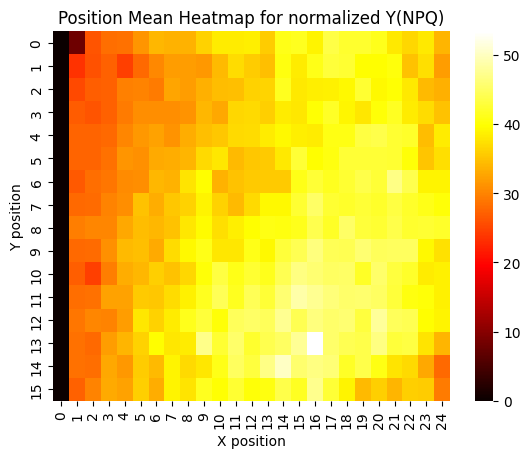

In [644]:
# get the average mean_ynpq for each well_id
mean_ynpq = data_norm_features.groupby('well_id')['mask_area'].mean()
# Extract x and y coordinates from positions
y = [ord(pos[0]) - ord('A') for pos in mean_ynpq.index]  # Convert letters to numerical values for y-axis
x = [int(pos[1:]) for pos in mean_ynpq.index]  # Extract numbers for x-axis

max_x = max(x) + 1
max_y = max(y) + 1
frequency_grid = [[0] * max_x for _ in range(max_y)]

# Fill the frequency grid with position counts
for i, pos in enumerate(mean_ynpq.index):
    frequency_grid[y[i]][x[i]] = mean_ynpq[pos]

 # Plot heatmap
sns.heatmap(frequency_grid, cmap='hot', fmt='d', cbar=True)

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Position Mean Heatmap for normalized Y(NPQ)')

# Show plot
plt.show()   

Text(0.5, 1.0, 'Density of abs_var_y2 for WT')

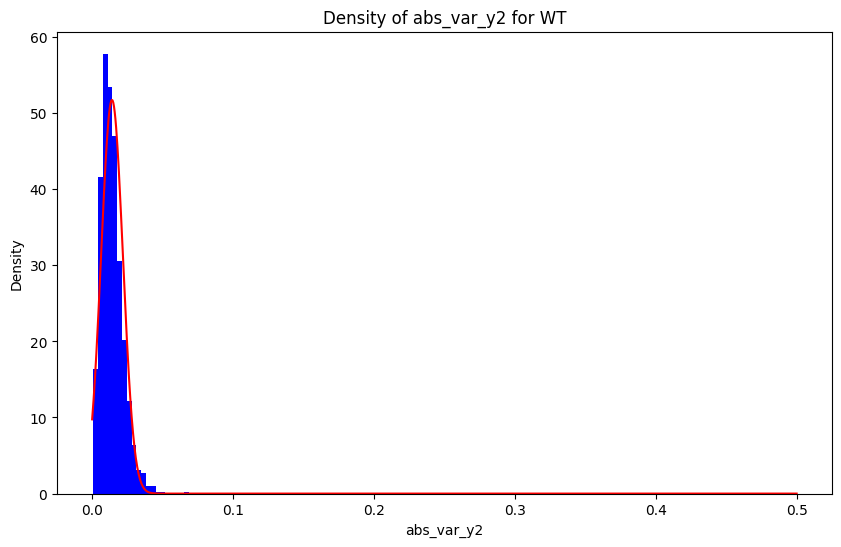

In [674]:
# plot a hist of 'abs_var_y2' for the WT and overlap the density of the abs value of a gaussian
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Extract the 'abs_var_y2' values for WT
abs_var_y2_WT = data_smoothed[data_smoothed['mutant_ID'] == 'WT']['abs_var_y2'].values

# Compute the mean and standard deviation of the 'abs_var_y2' values for WT
mean_abs_var_y2_WT = abs_var_y2_WT.mean()
std_abs_var_y2_WT = abs_var_y2_WT.std()

# Generate a range of x values
x = np.linspace(0, 0.5, 1000)

# Compute the density of the absolute value of a Gaussian distribution
y = 1/(std_abs_var_y2_WT * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean_abs_var_y2_WT) / std_abs_var_y2_WT)**2)

# Plot the histogram of 'abs_var_y2' values for WT
plt.figure(figsize=(10, 6))
plt.hist(abs_var_y2_WT, bins=20, density=True, color='blue', label='WT')
plt.plot(x, y, color='red', label='Gaussian Density')
plt.xlabel('abs_var_y2')
plt.ylabel('Density')
plt.title('Density of abs_var_y2 for WT')

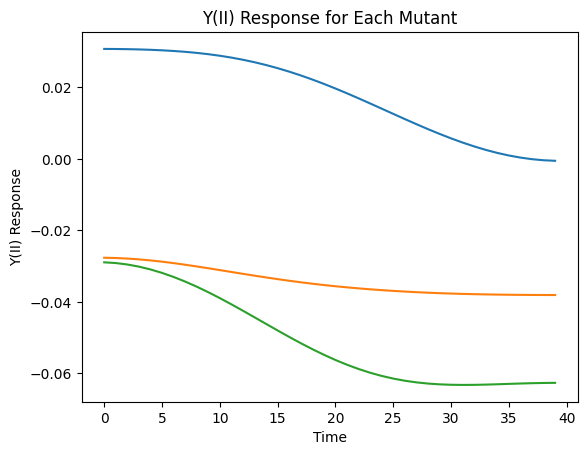

In [209]:
Data_analysis_func.plot_y2(data_smoothed[(data_smoothed['light_regime'] == '20h_HL')].iloc[:3])

In [224]:
data_clusters = Clusters.get_clusters(data_norm_flagged, 't-sne', 3)

/Users/samsongourevitch/Documents/Chlamy_Project/venv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/samsongourevitch/Documents/Chlamy_Project/venv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/Users/samsongourevitch/Documents/Chlamy_Project/venv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/samsongourevitch/Documents/Chlamy_Project/venv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/Users/samsongourevitch/Documents/Chlamy_Project/venv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:7

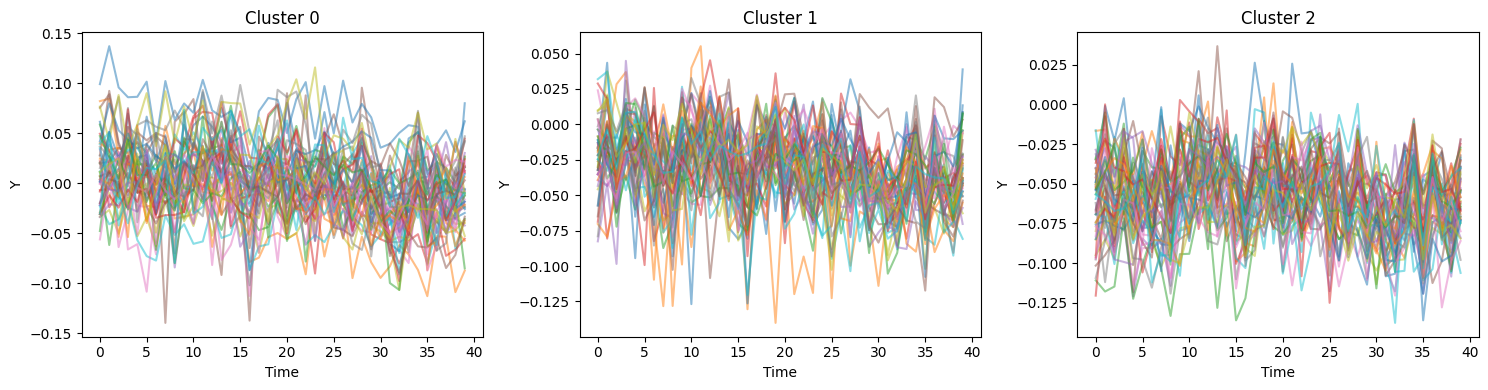

In [225]:
Clusters.plot_clusters(data_clusters[data_clusters['light_regime'] == '20h_HL'], 't-sne', n=50)